In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test_df = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')


## **Data Exploration**

In [3]:
train_df.head(5)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [4]:
train_df.shape

(14731, 22)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [6]:
train_df.corr(min_periods=1)


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase,Made_Purchase
HomePage,1.000000e+00,0.596581,0.370966,0.260887,0.438757,0.372084,-0.226211,-0.318995,0.107927,-0.083924,-0.004994,-0.023313,-7.702525e-07,-0.037590,0.025796,0.052235
HomePage_Duration,5.965807e-01,1.000000,0.305111,0.260649,0.303806,0.384964,-0.144184,-0.205342,0.070127,-0.067671,-0.005206,-0.023967,-6.460506e-03,-0.021235,0.023926,0.042043
LandingPage,3.709664e-01,0.305111,1.000000,0.621425,0.378770,0.393737,-0.119836,-0.166396,0.052336,-0.045113,-0.004427,-0.033020,-3.347384e-02,-0.033209,0.039599,0.042832
LandingPage_Duration,2.608868e-01,0.260649,0.621425,1.000000,0.303691,0.397527,-0.075672,-0.105443,0.039144,-0.031155,-0.001194,-0.014035,-3.633766e-02,-0.020920,0.027222,0.027151
ProductDescriptionPage,4.387566e-01,0.303806,0.378770,0.303691,1.000000,0.847745,-0.208012,-0.296330,0.060120,-0.010994,0.009769,-0.007524,-4.270499e-02,-0.041027,0.015533,0.068328
ProductDescriptionPage_Duration,3.720836e-01,0.384964,0.393737,0.397527,0.847745,1.000000,-0.180863,-0.246392,0.056498,-0.029276,0.007215,-0.003413,-3.649863e-02,-0.031030,0.005213,0.066225
GoogleMetric:Bounce Rates,-2.262110e-01,-0.144184,-0.119836,-0.075672,-0.208012,-0.180863,1.000000,0.917069,-0.109711,0.069349,0.018894,-0.017315,-8.233936e-03,0.080653,-0.044102,-0.053724
GoogleMetric:Exit Rates,-3.189946e-01,-0.205342,-0.166396,-0.105443,-0.296330,-0.246392,0.917069,1.000000,-0.159273,0.097137,0.005980,-0.008442,-1.439128e-02,0.082219,-0.060329,-0.071258
GoogleMetric:Page Values,1.079271e-01,0.070127,0.052336,0.039144,0.060120,0.056498,-0.109711,-0.159273,1.000000,-0.056125,0.025200,0.046639,2.089536e-02,0.010458,0.004160,0.205206
SeasonalPurchase,-8.392428e-02,-0.067671,-0.045113,-0.031155,-0.010994,-0.029276,0.069349,0.097137,-0.056125,1.000000,0.009923,0.008353,-1.802956e-02,0.042734,-0.015069,-0.017940


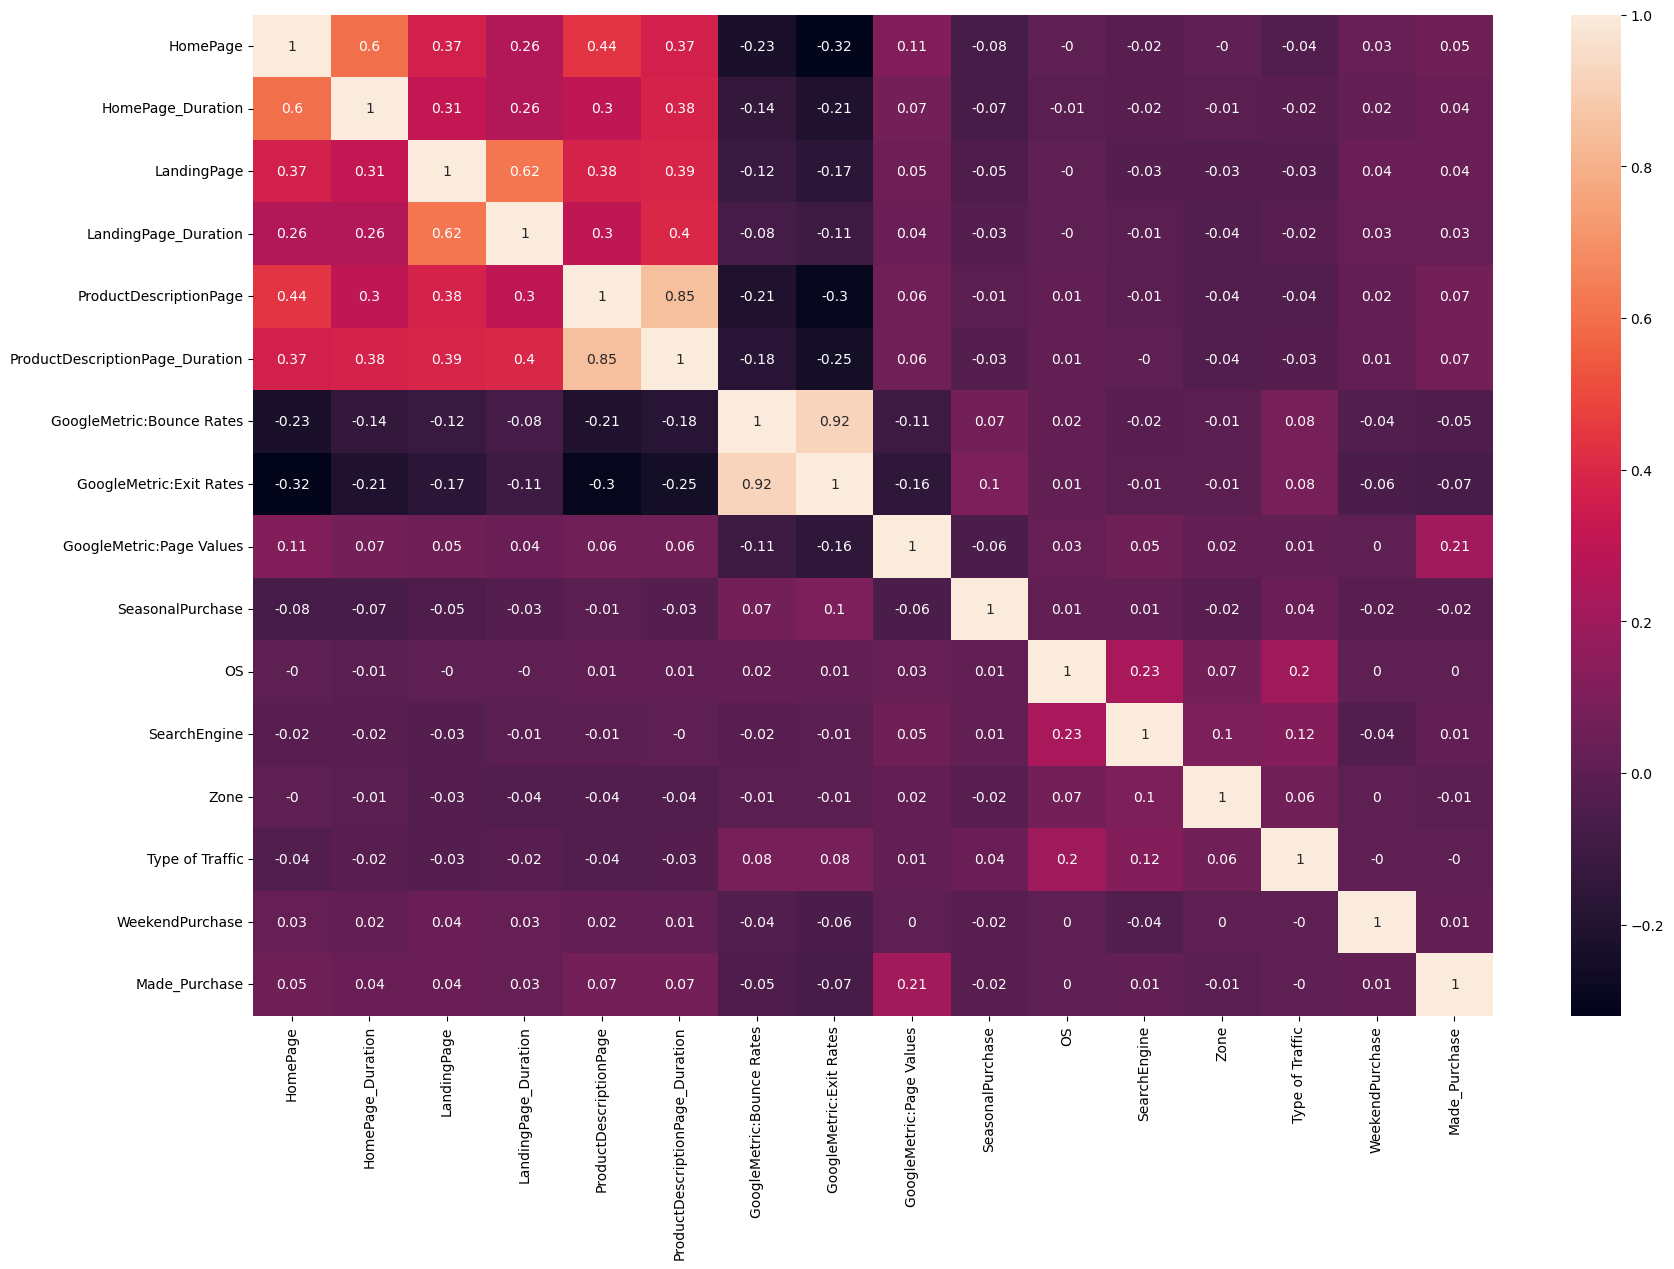

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


matrix = train_df.corr().round(2)
plt.rcParams["figure.figsize"] = (20,13)
sns.heatmap(matrix, annot=True)
plt.show()

In [8]:
# train_df.plot.kde()

#### **Drop Column 'GoogleMetric:Exit Rates'**

In [9]:
data = train_df.drop(['GoogleMetric:Exit Rates'], axis=1)    # This Column is droped because this is highly corelated with "GoogleMetric:Bounce Rates" Column

In [10]:
train_df = data

In [11]:
train_df.dtypes

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
Made_Purchase                         bool
dtype: object

In [12]:
data = train_df.drop('Made_Purchase', 1)
# data = train_df.drop('Made_Purchase', 1)
y = train_df['Made_Purchase']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [13]:
# Necessary Import 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import *
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

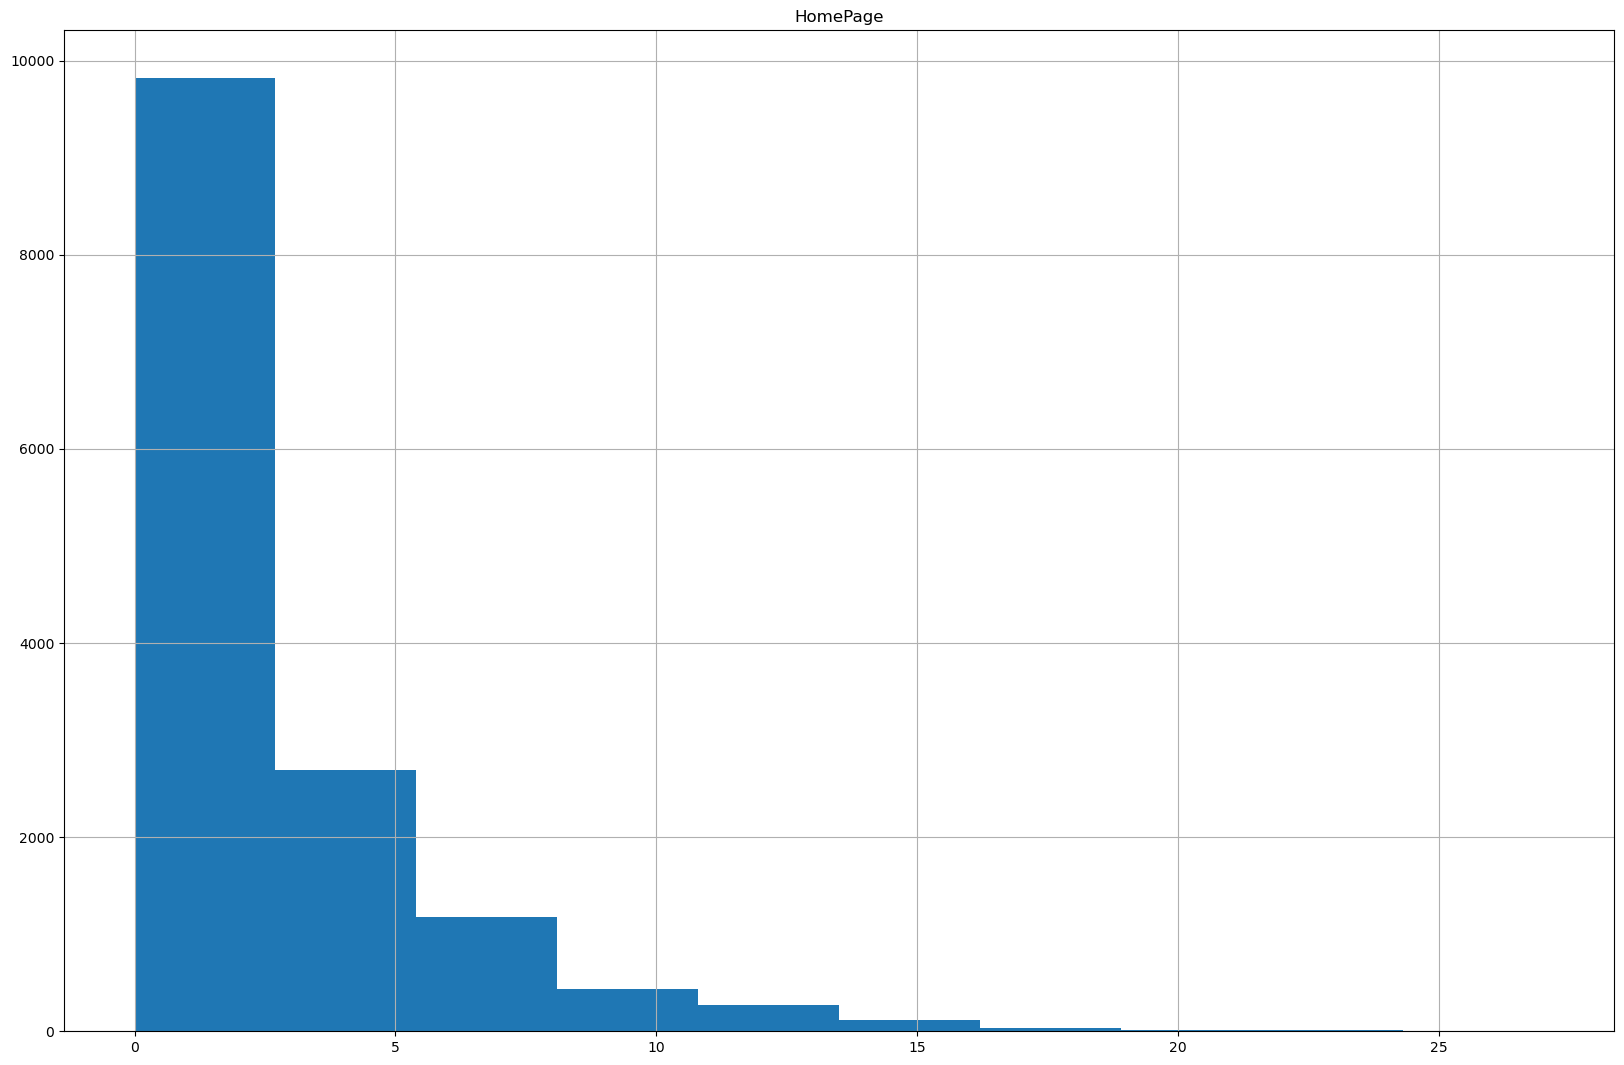

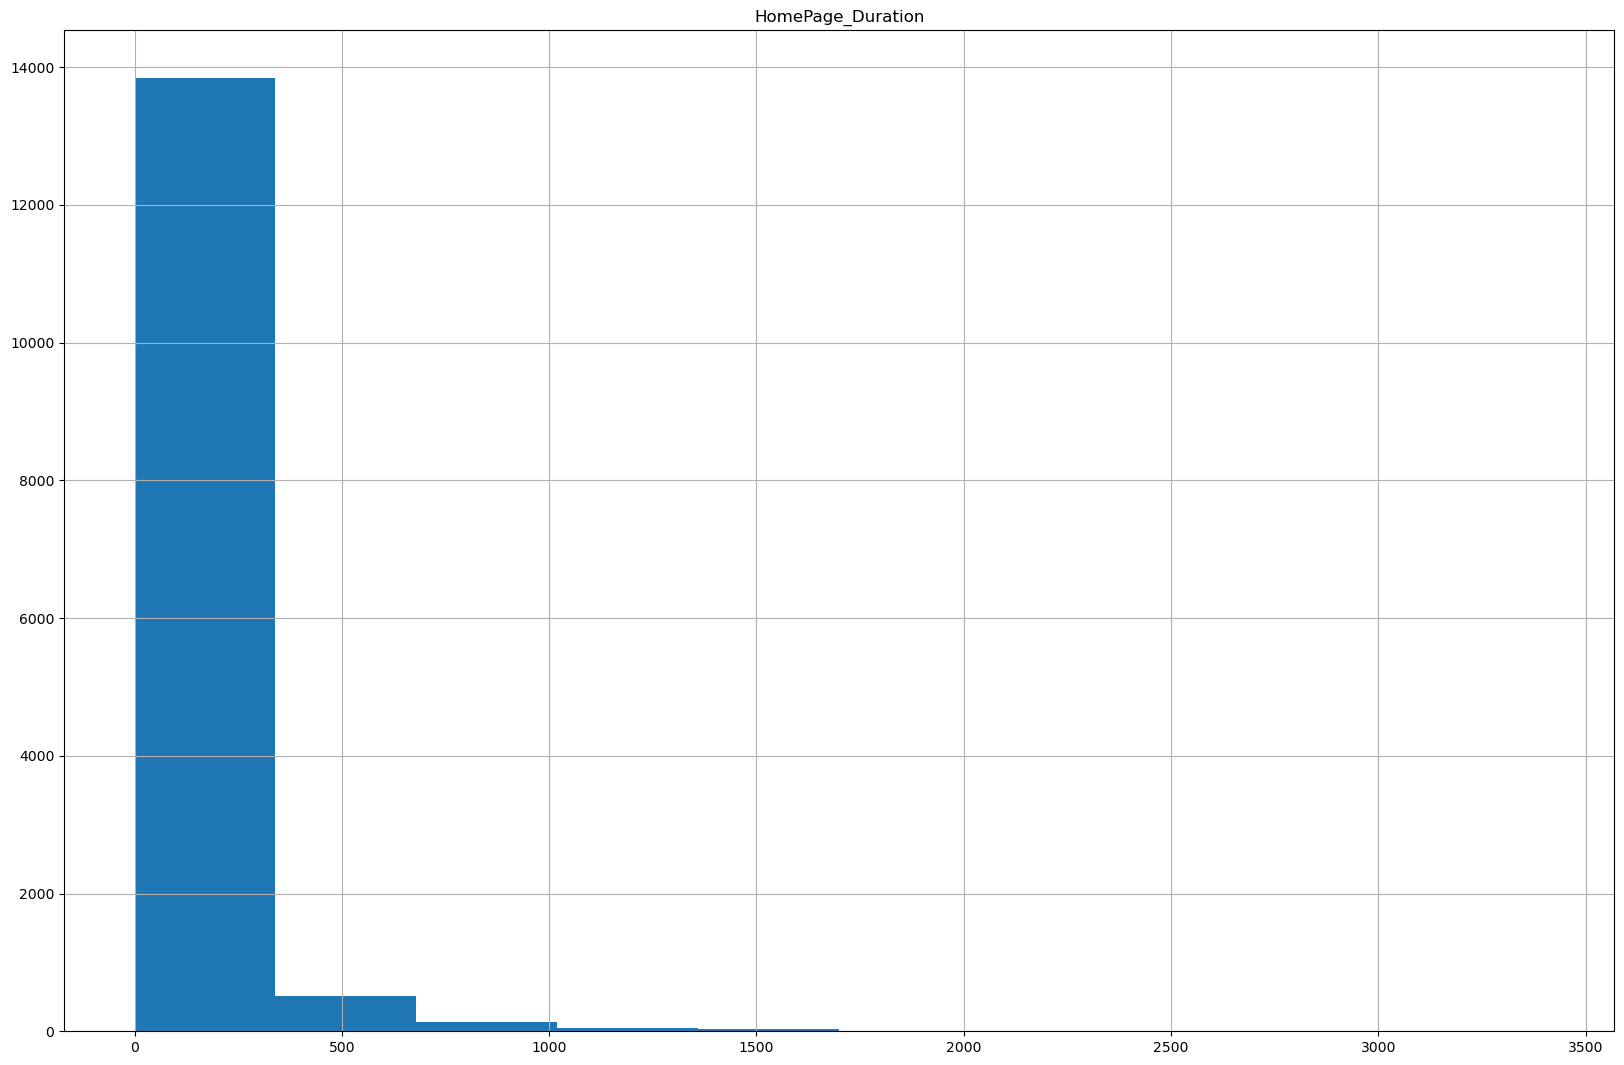

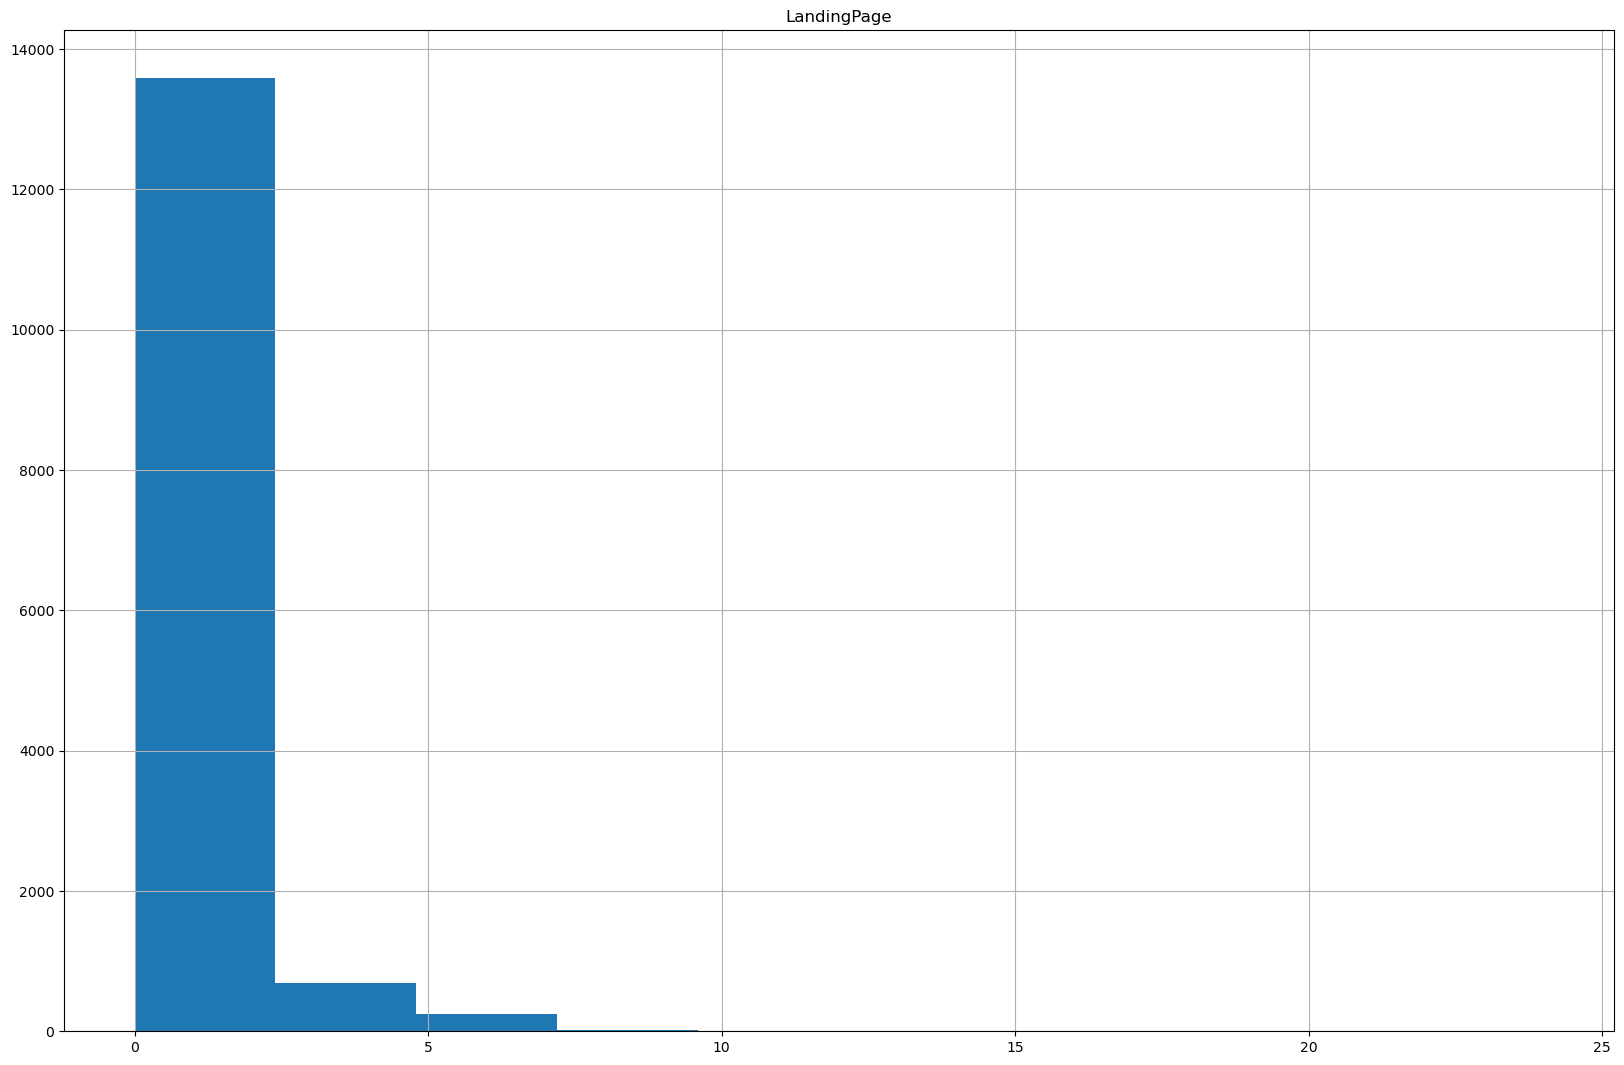

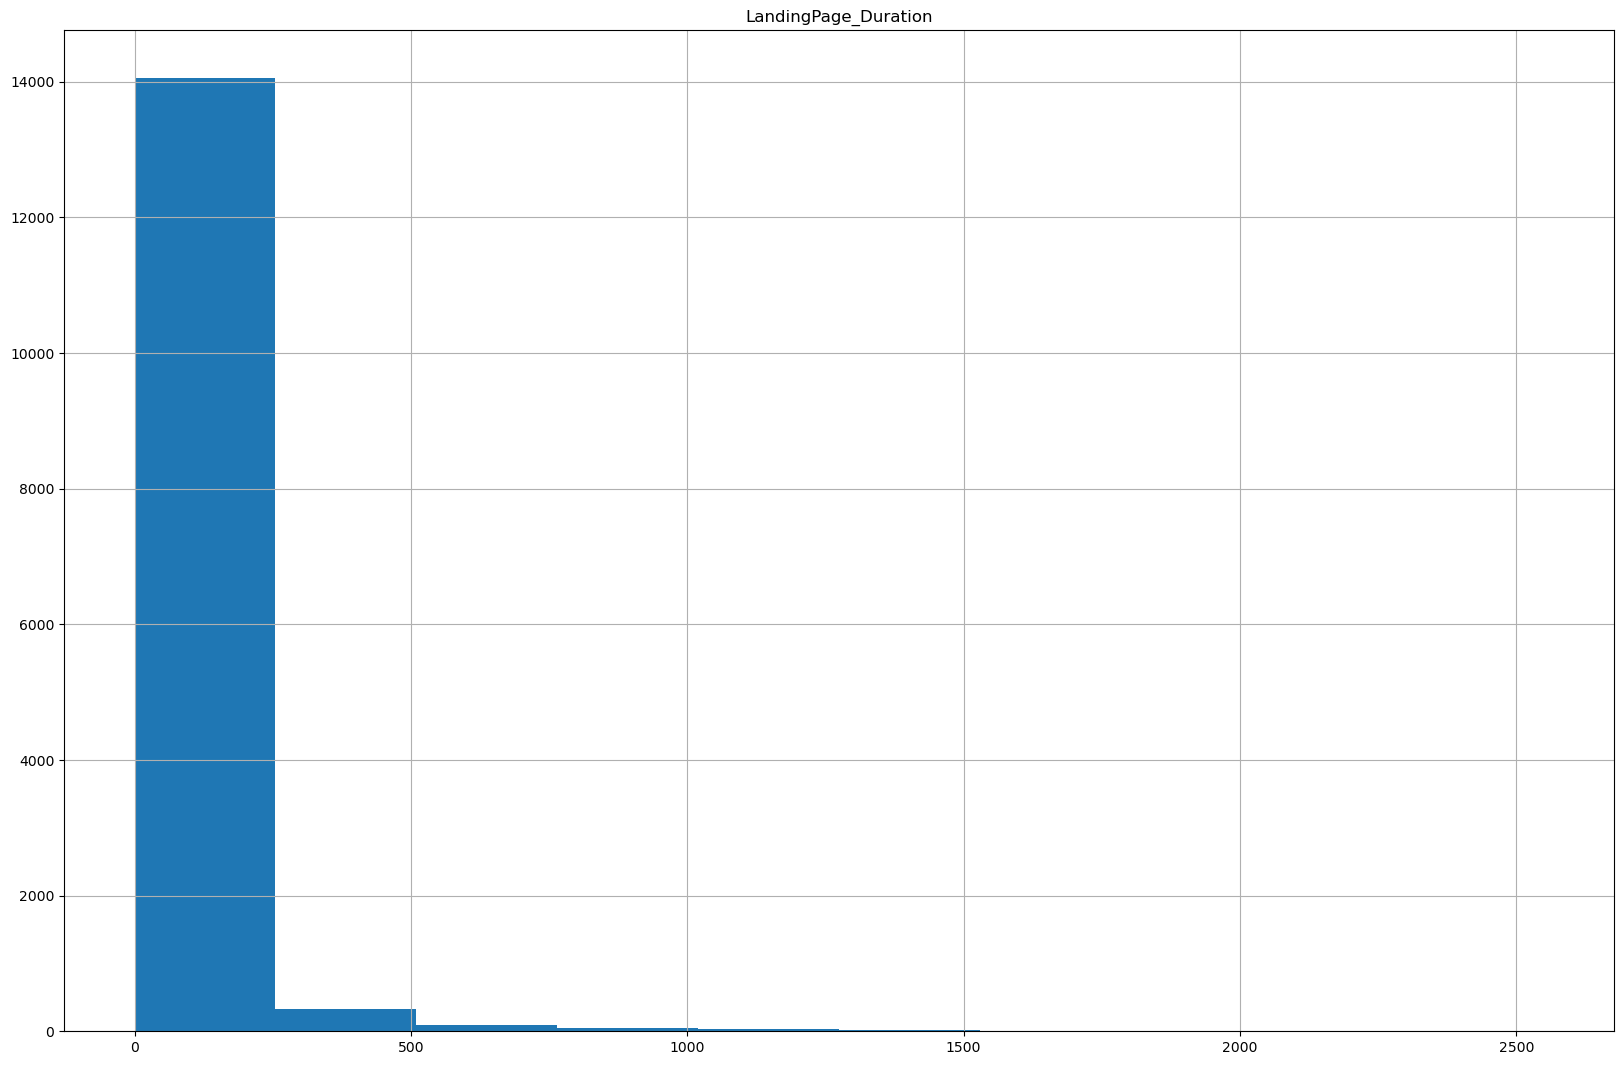

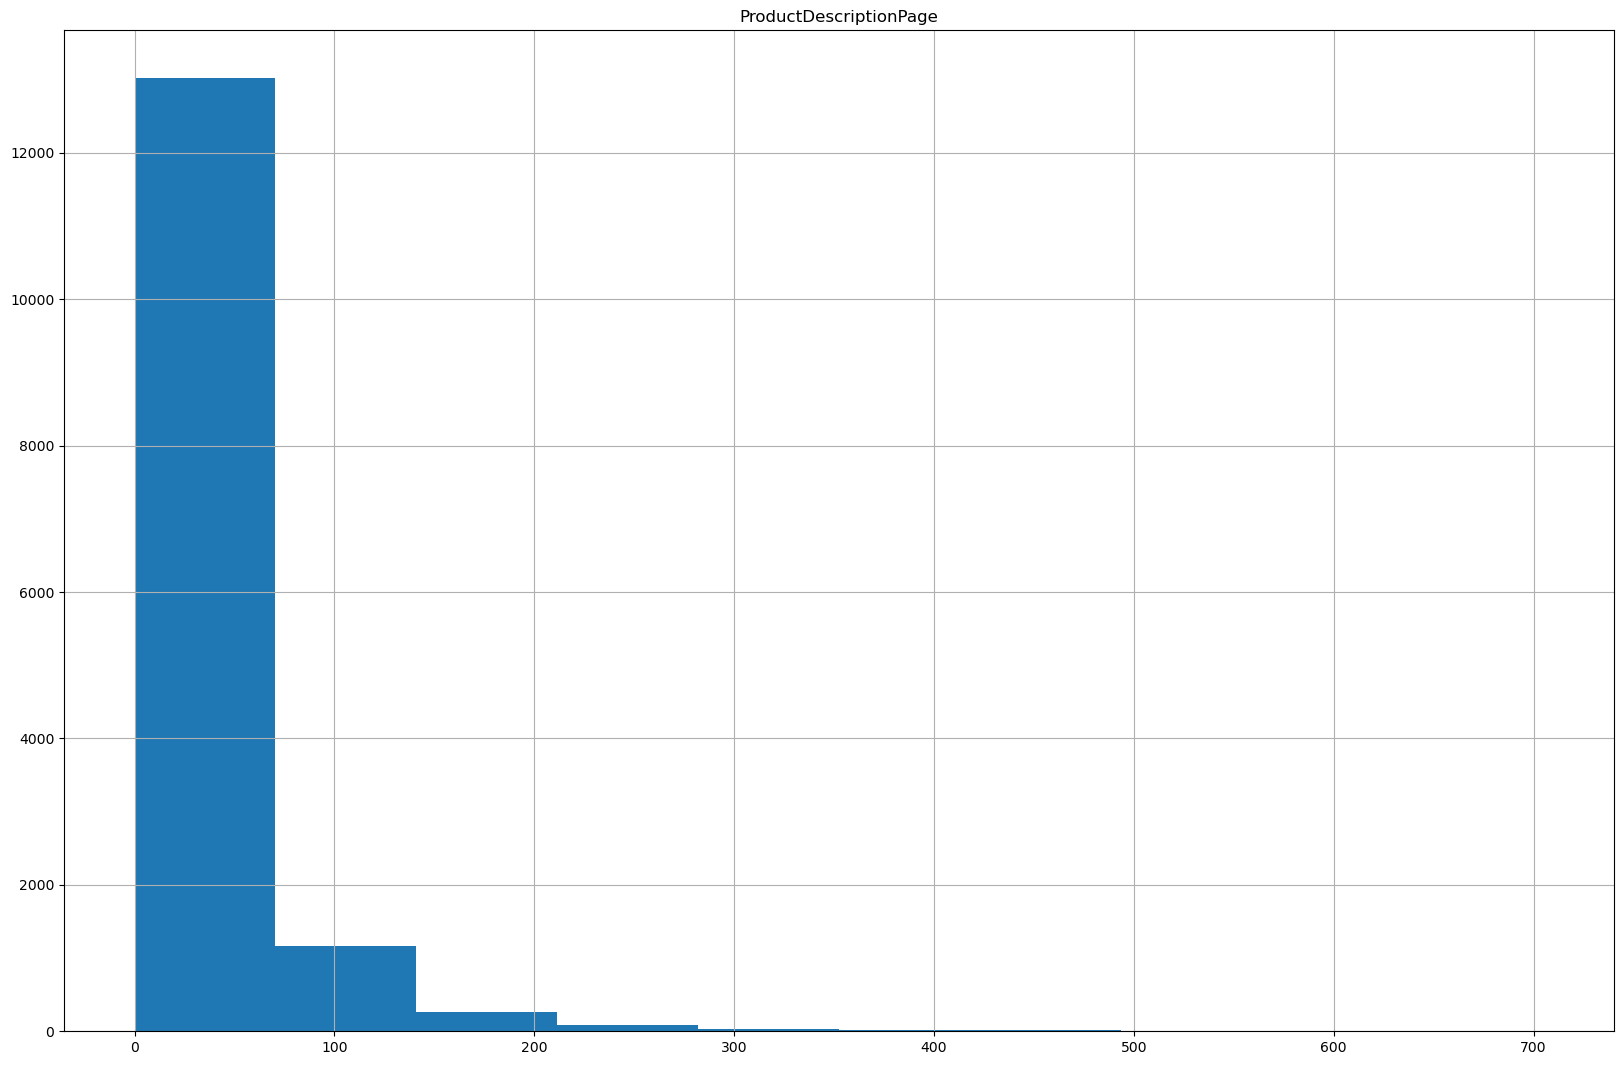

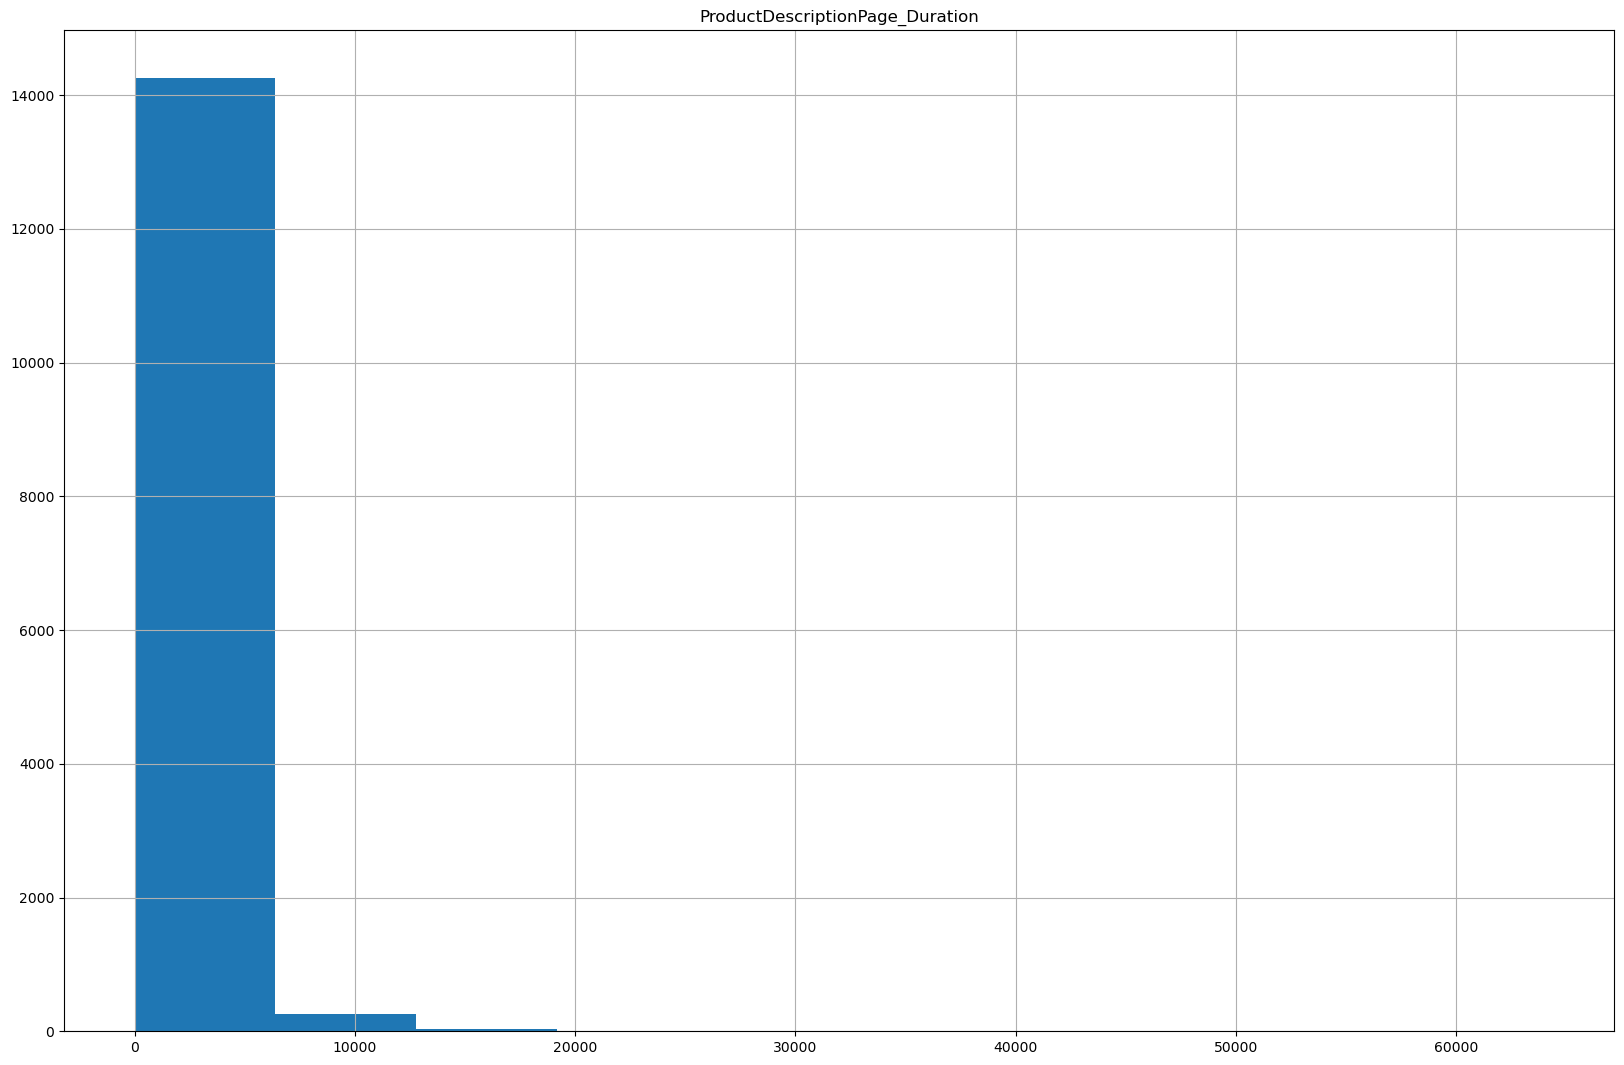

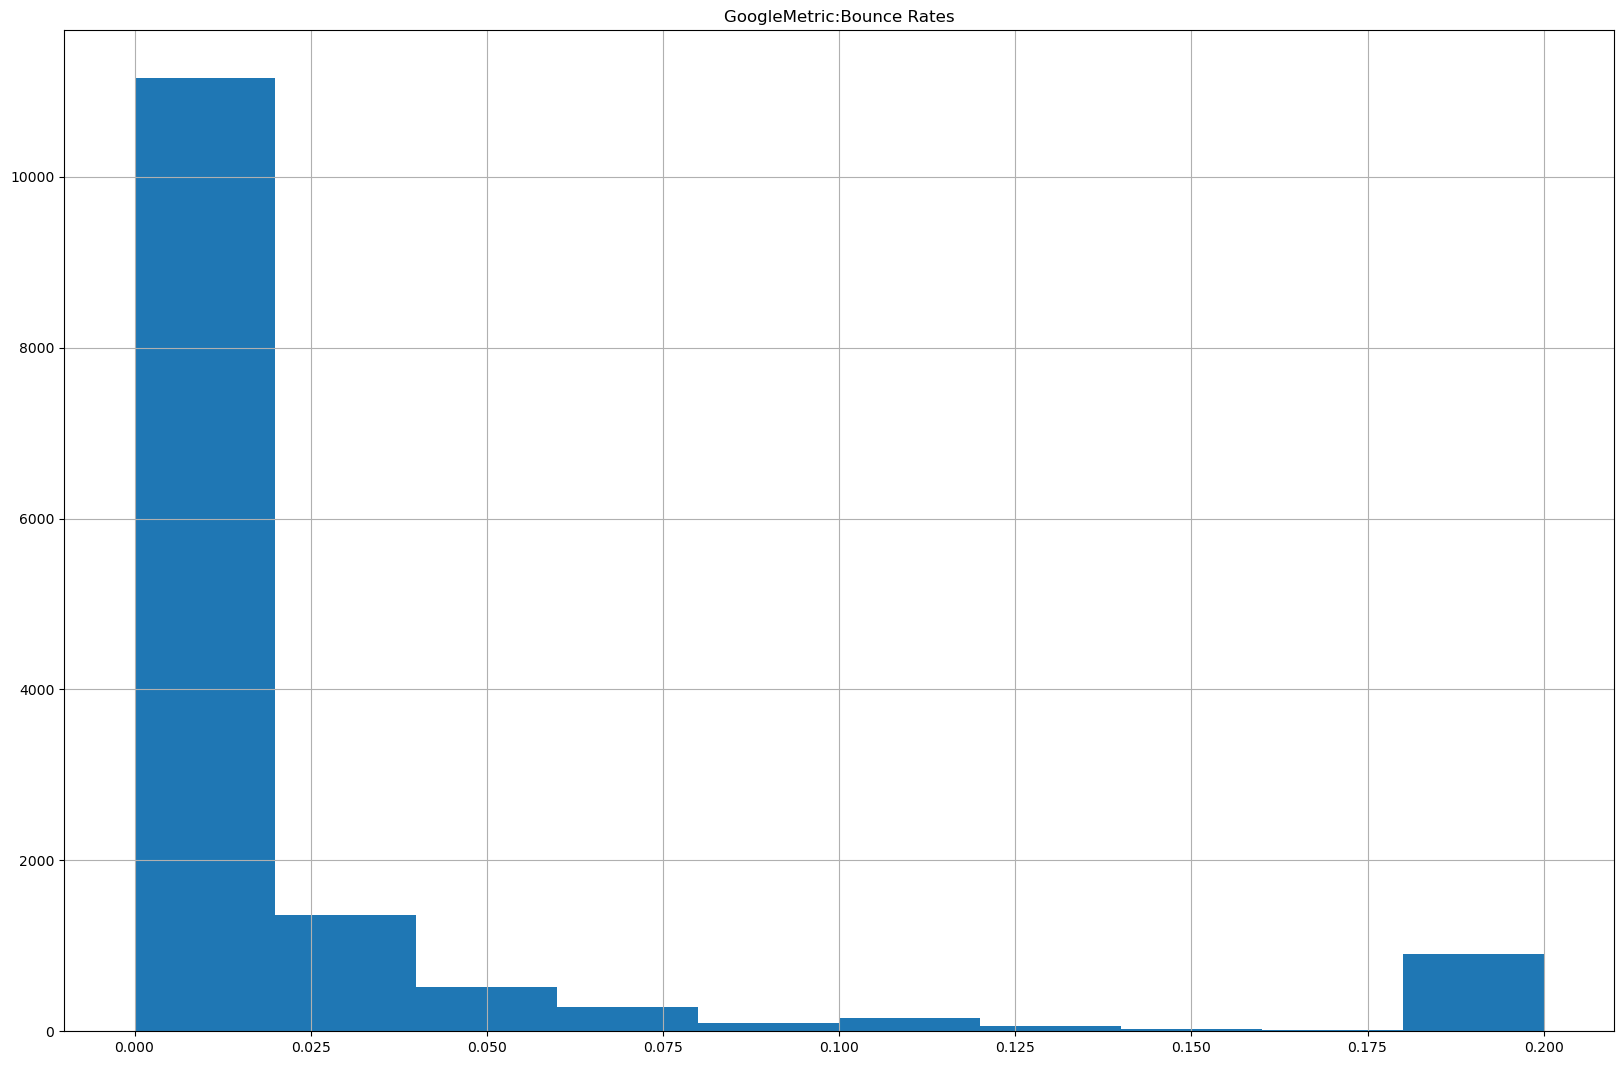

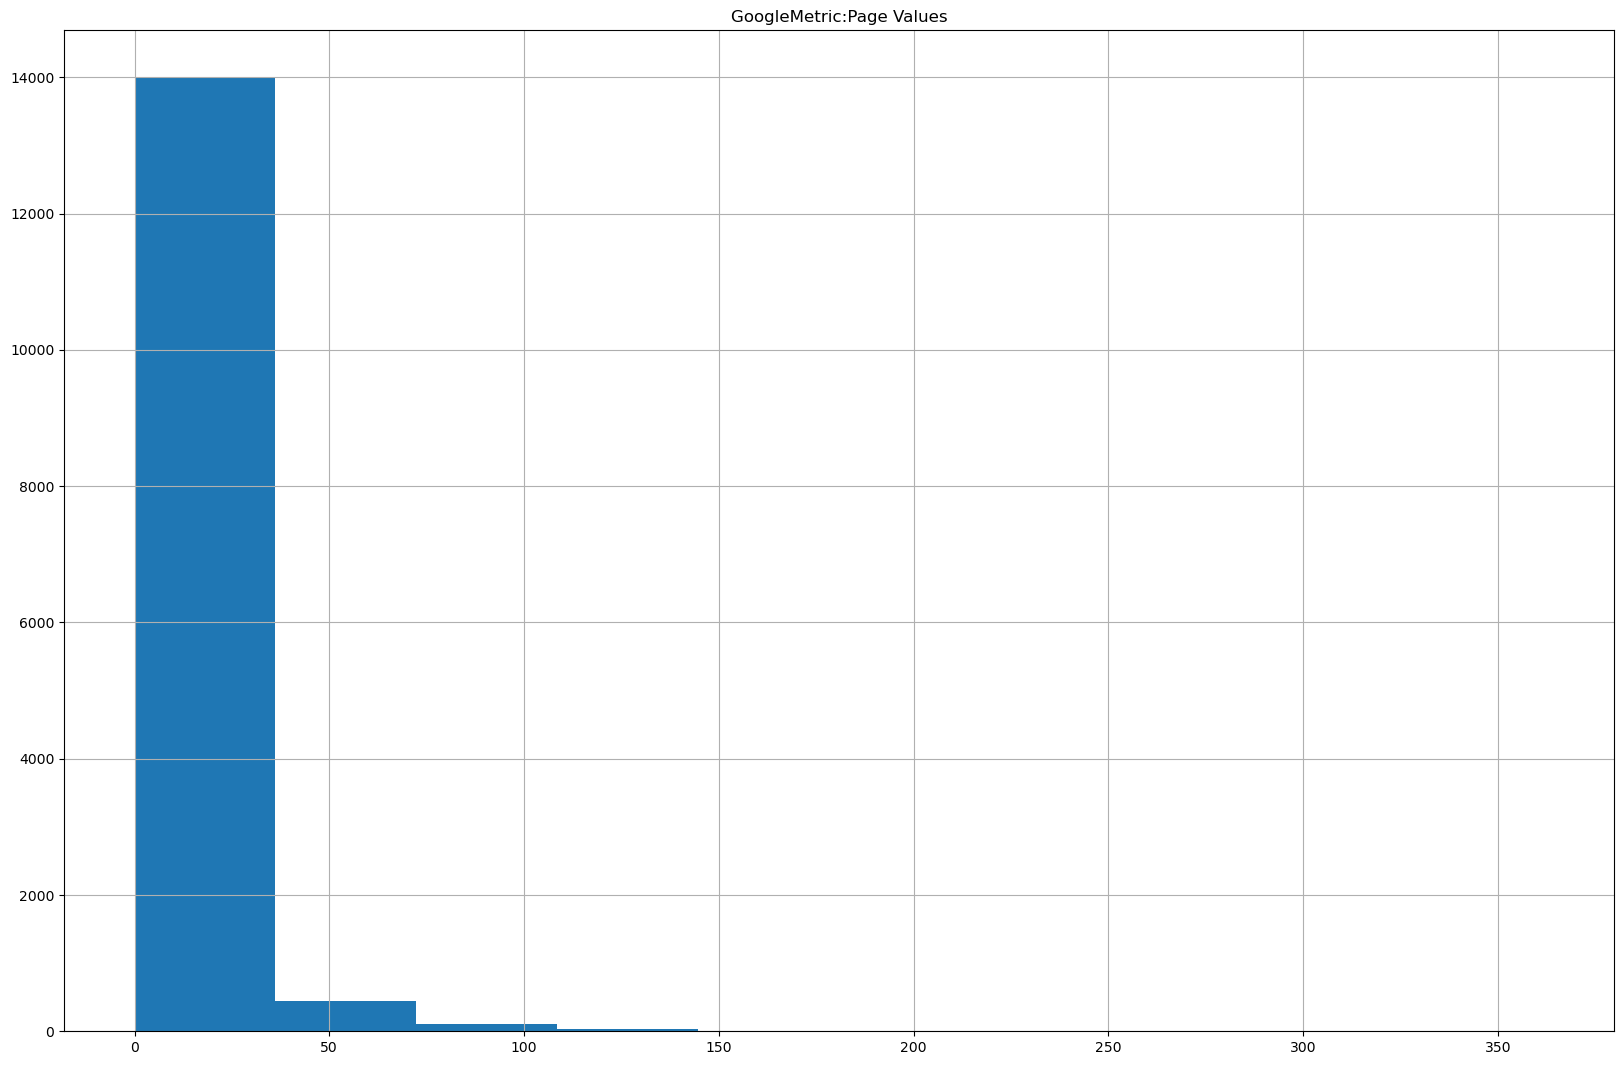

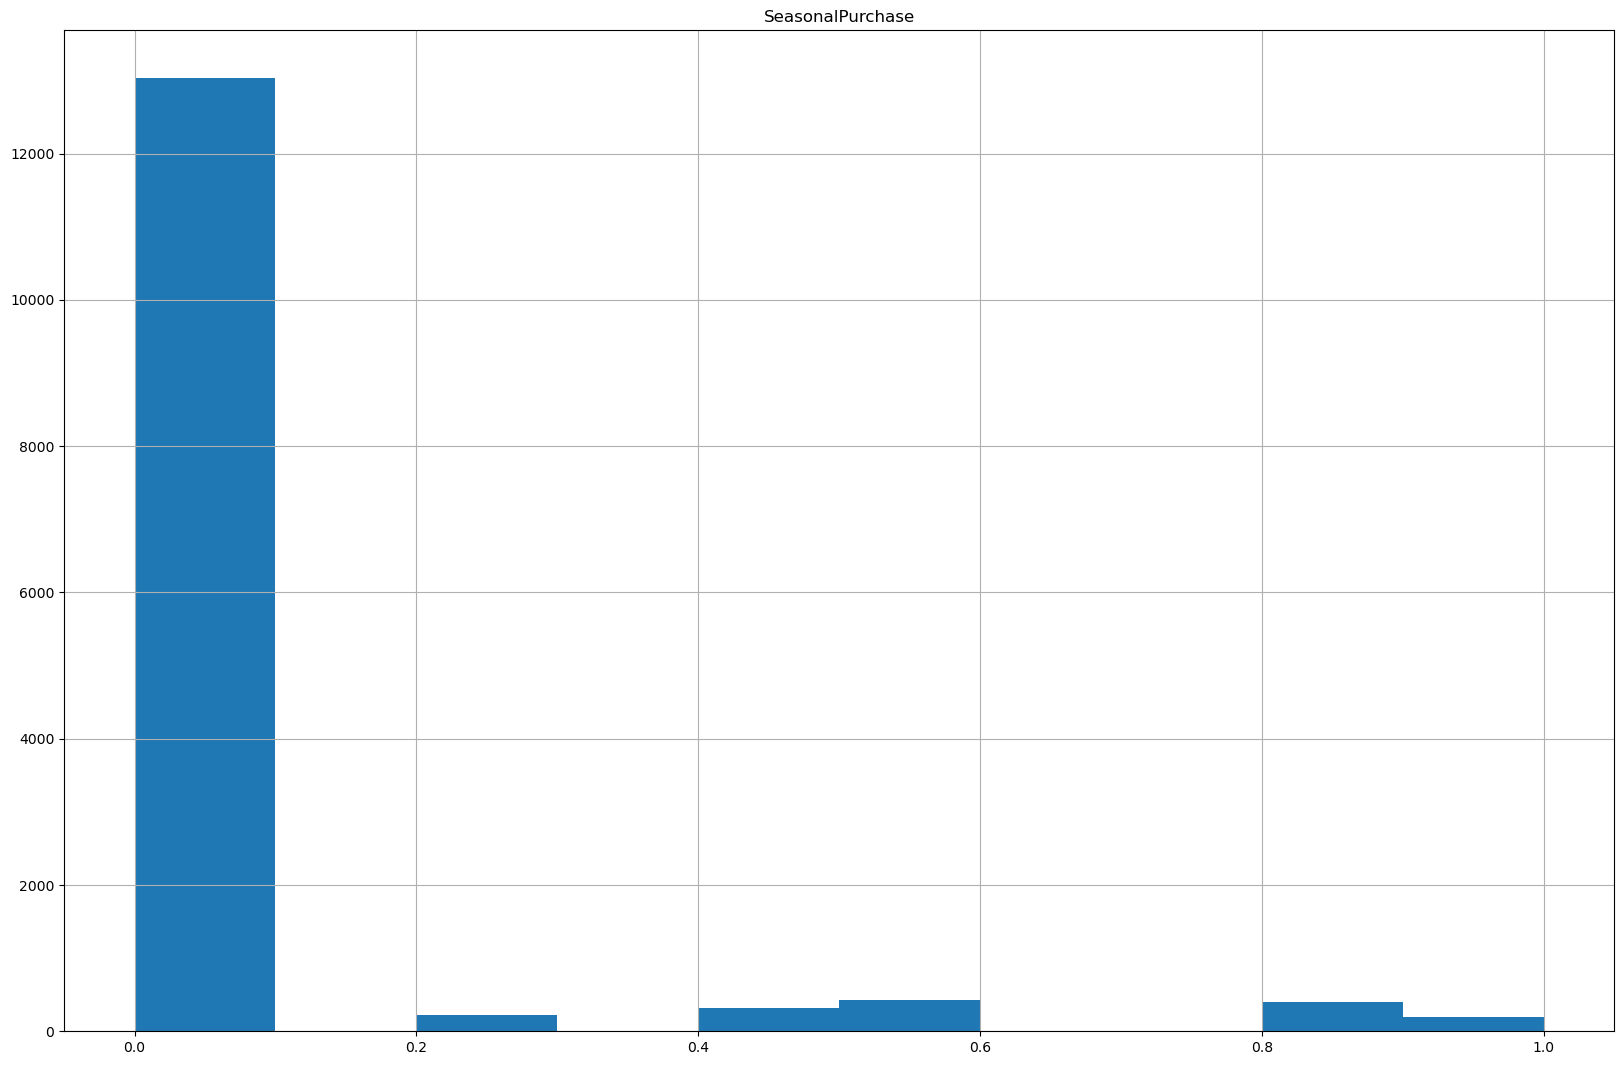

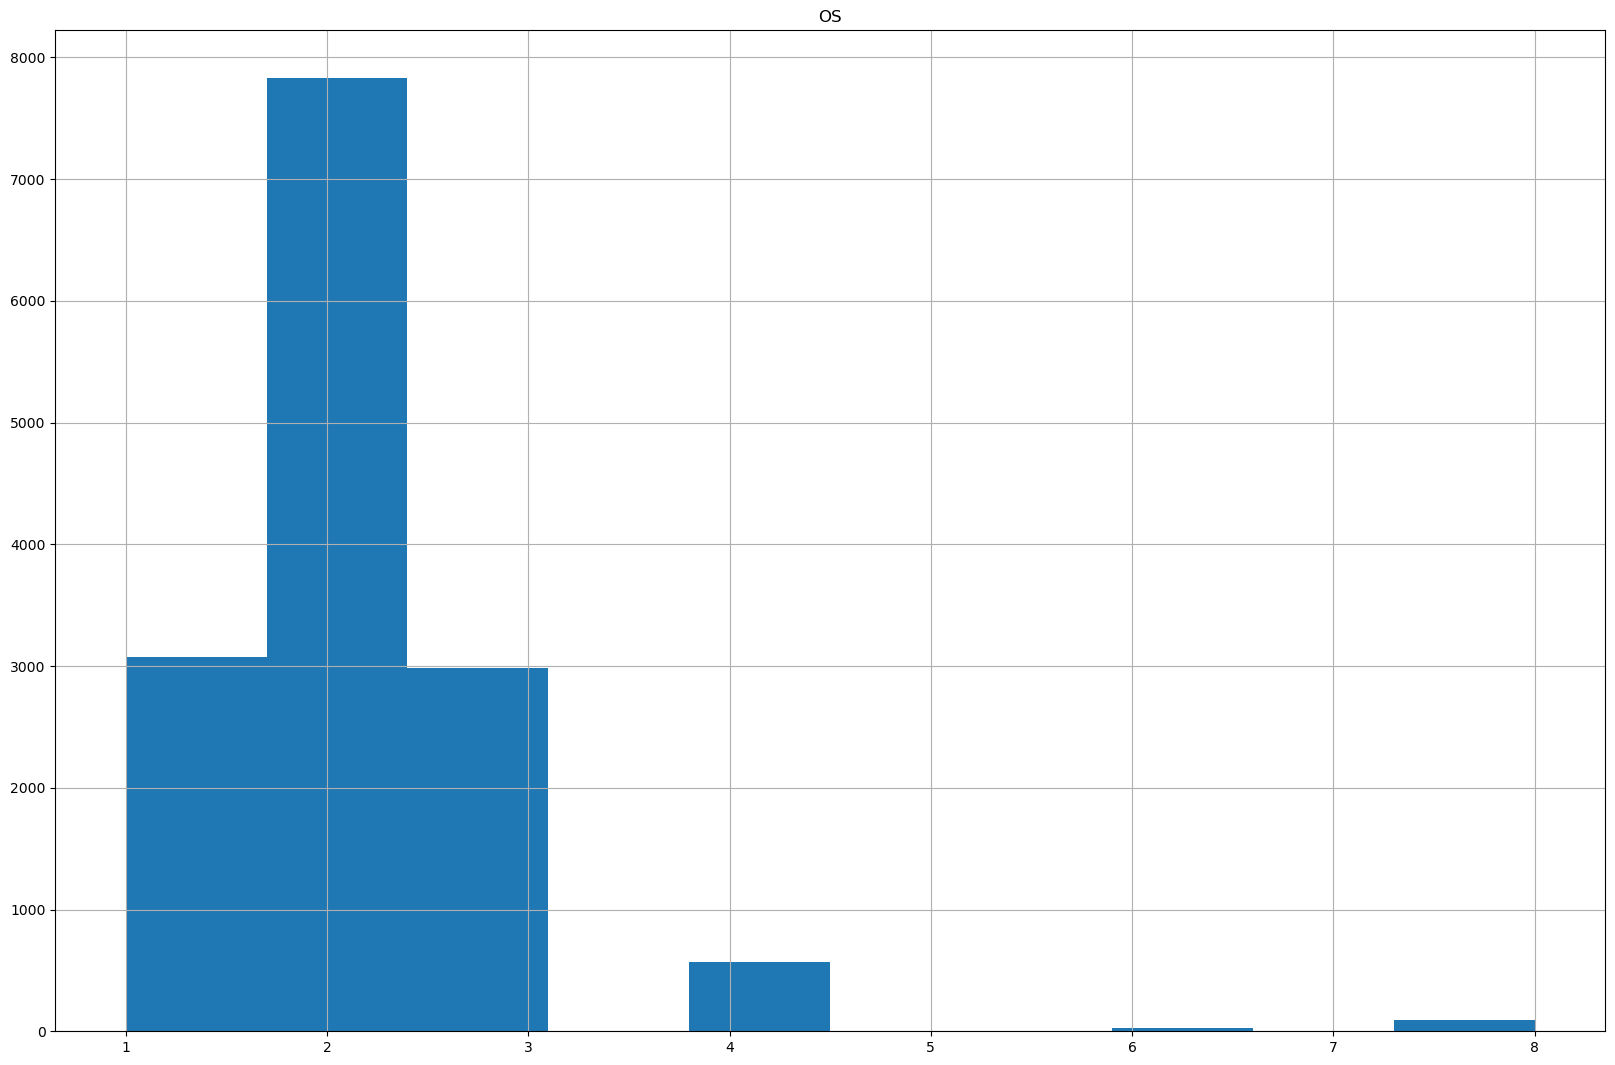

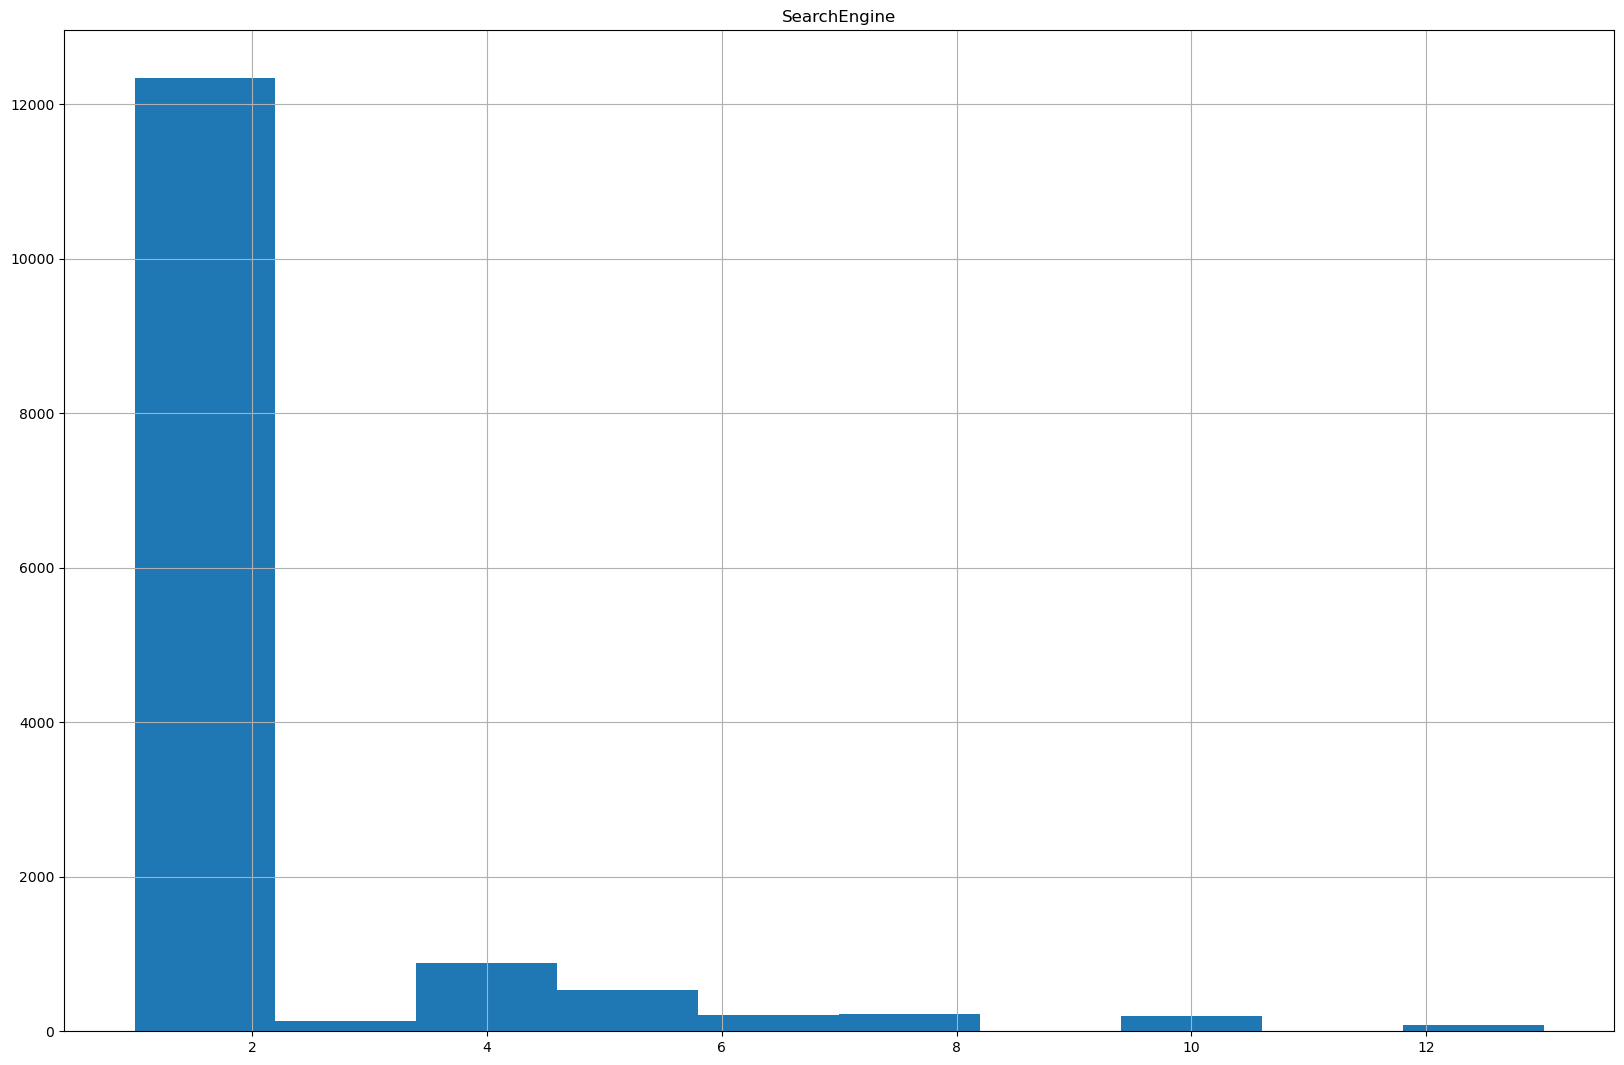

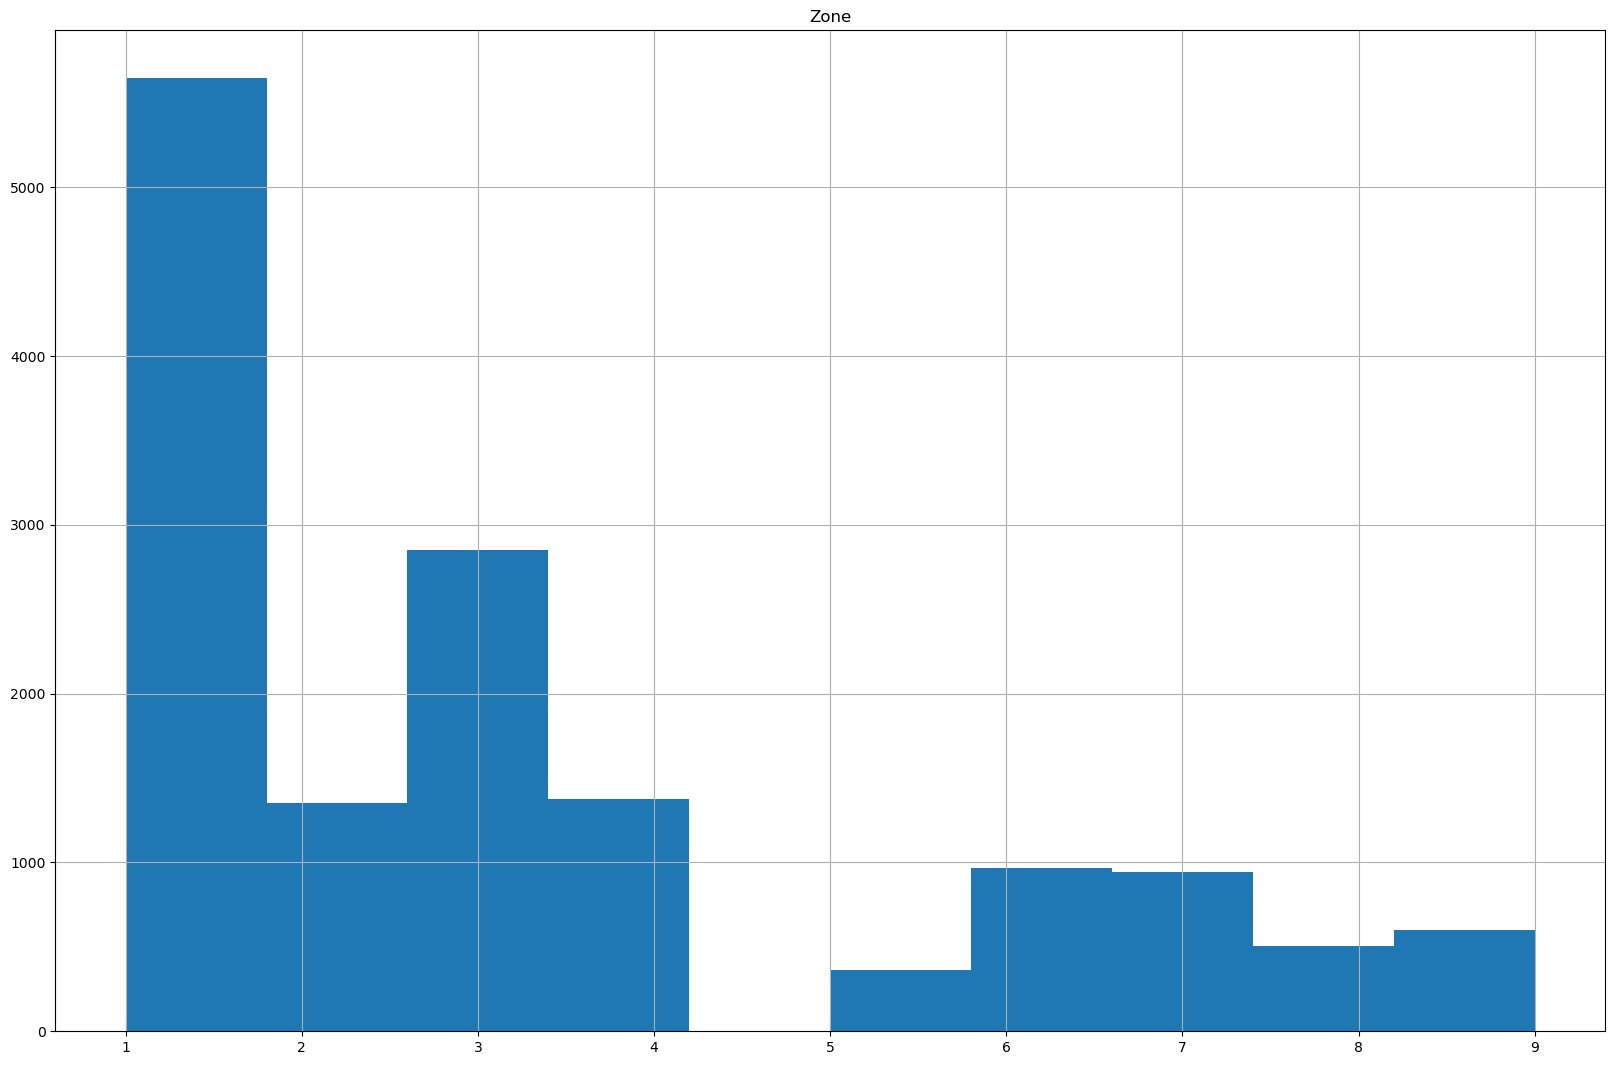

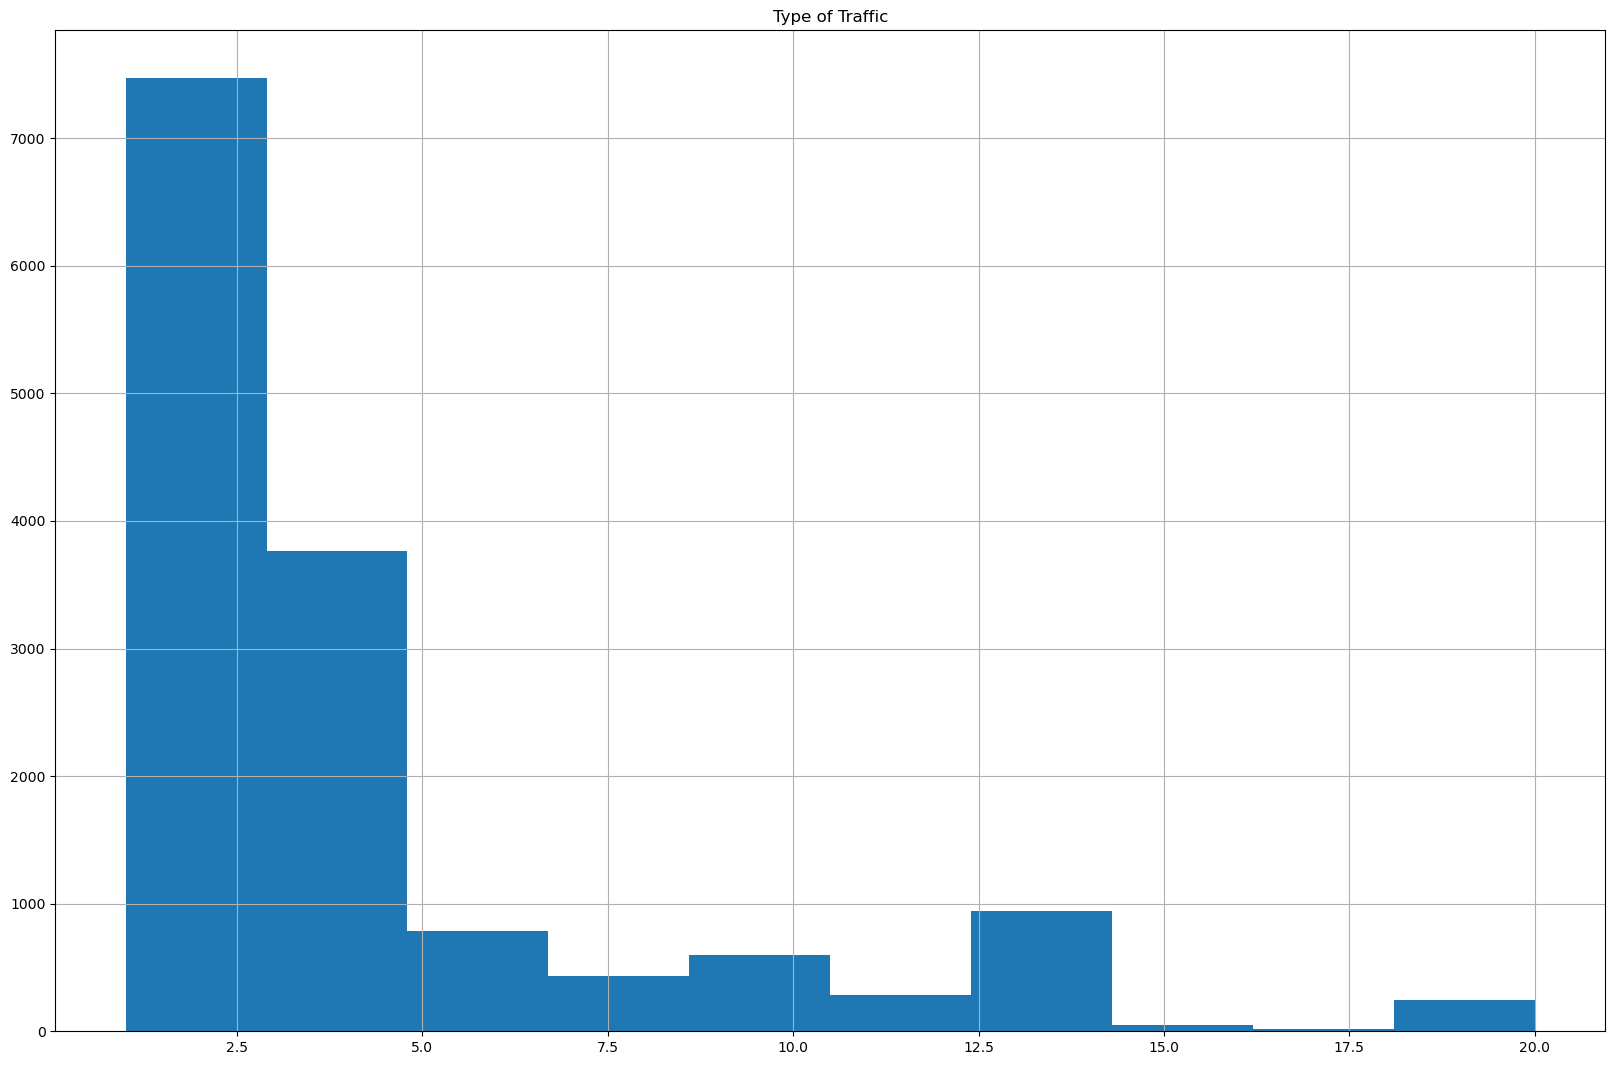

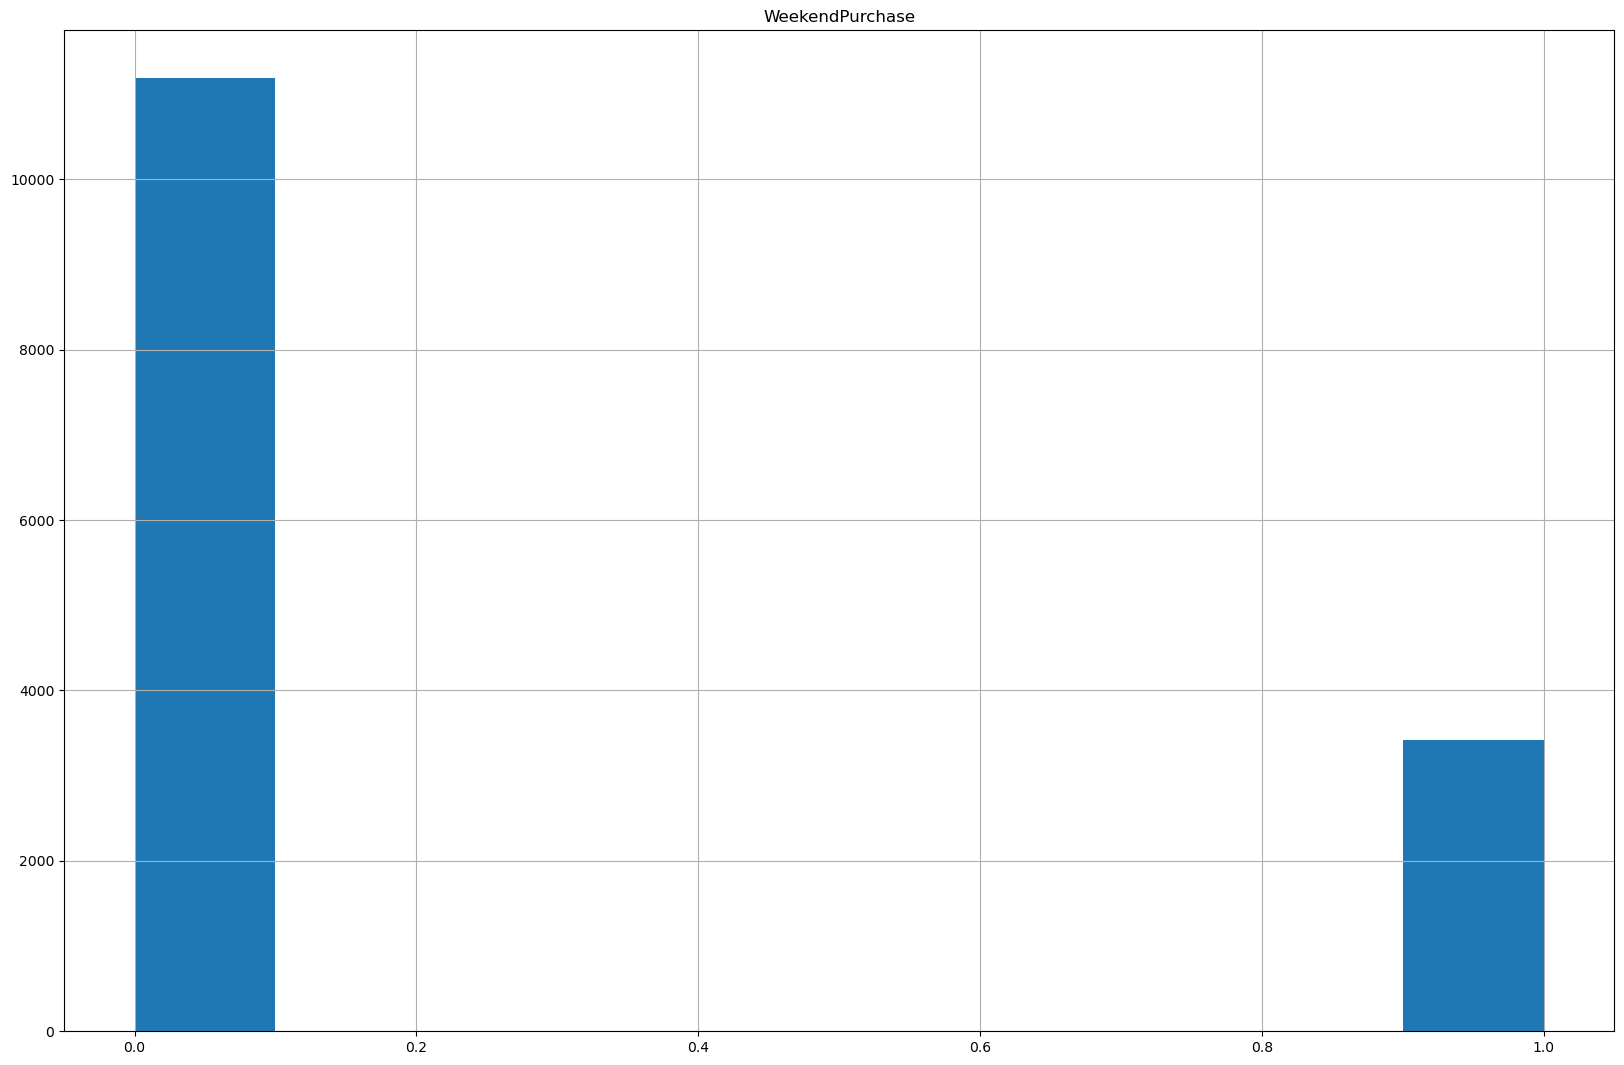

In [14]:
for col in data.select_dtypes(include=['float64']):
    plt.figure()
    train_df[col].hist()
    plt.title(col)

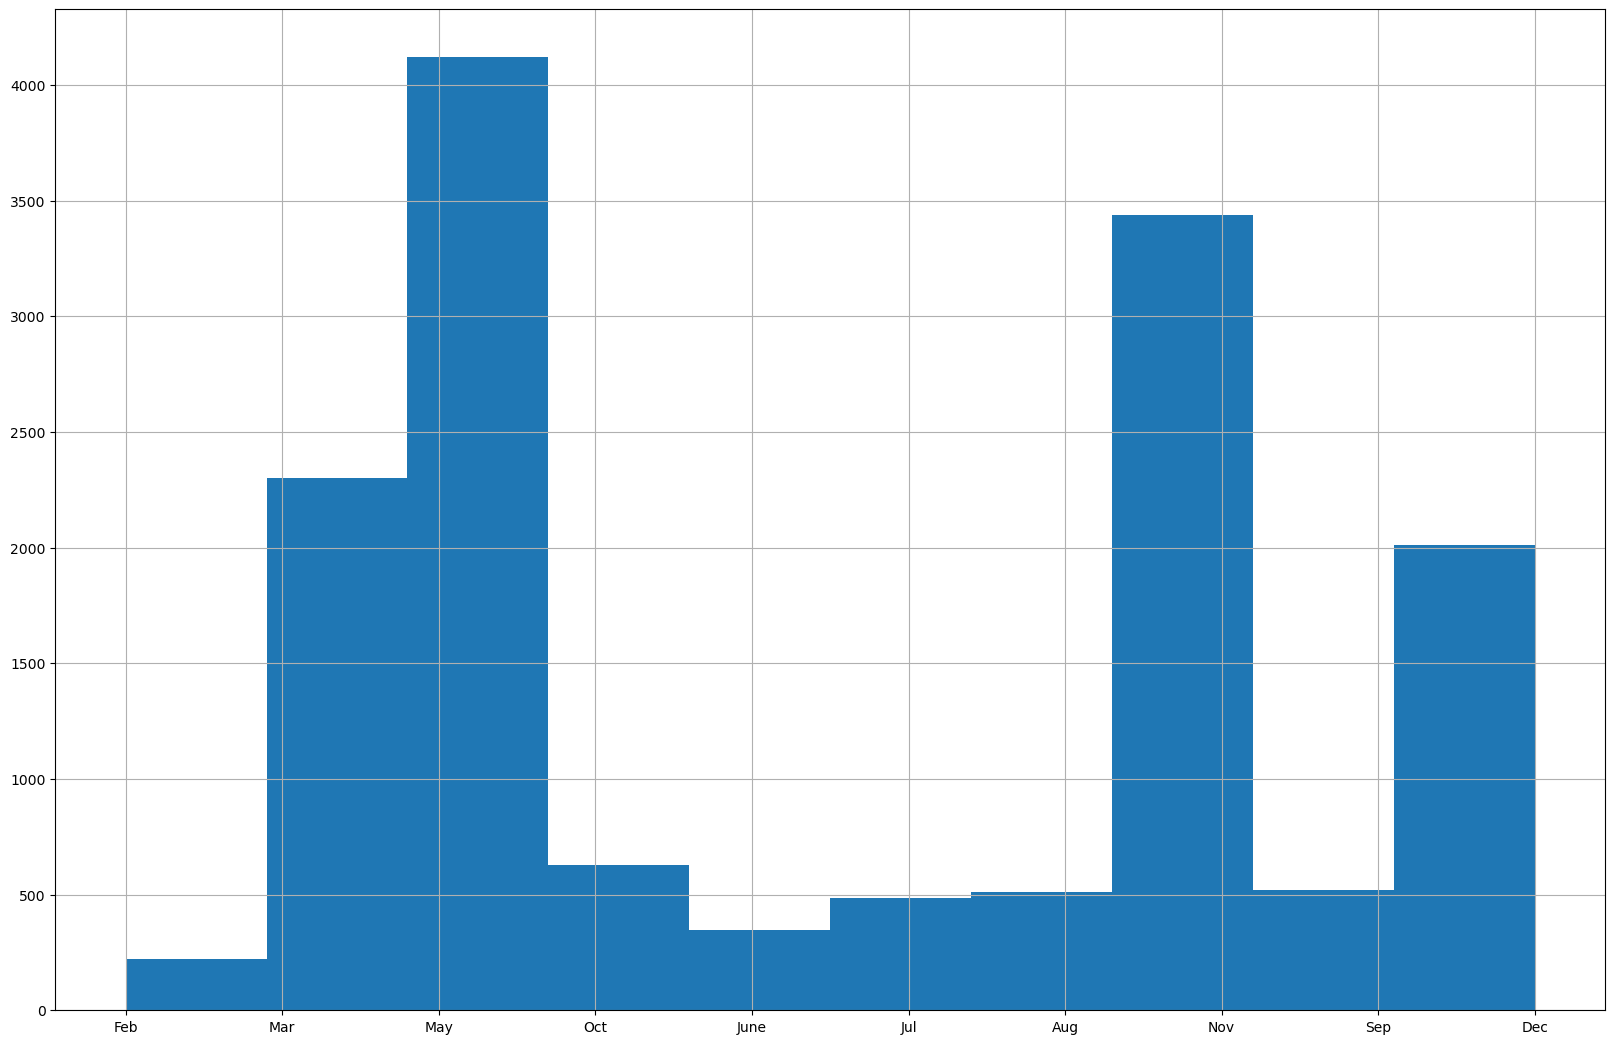

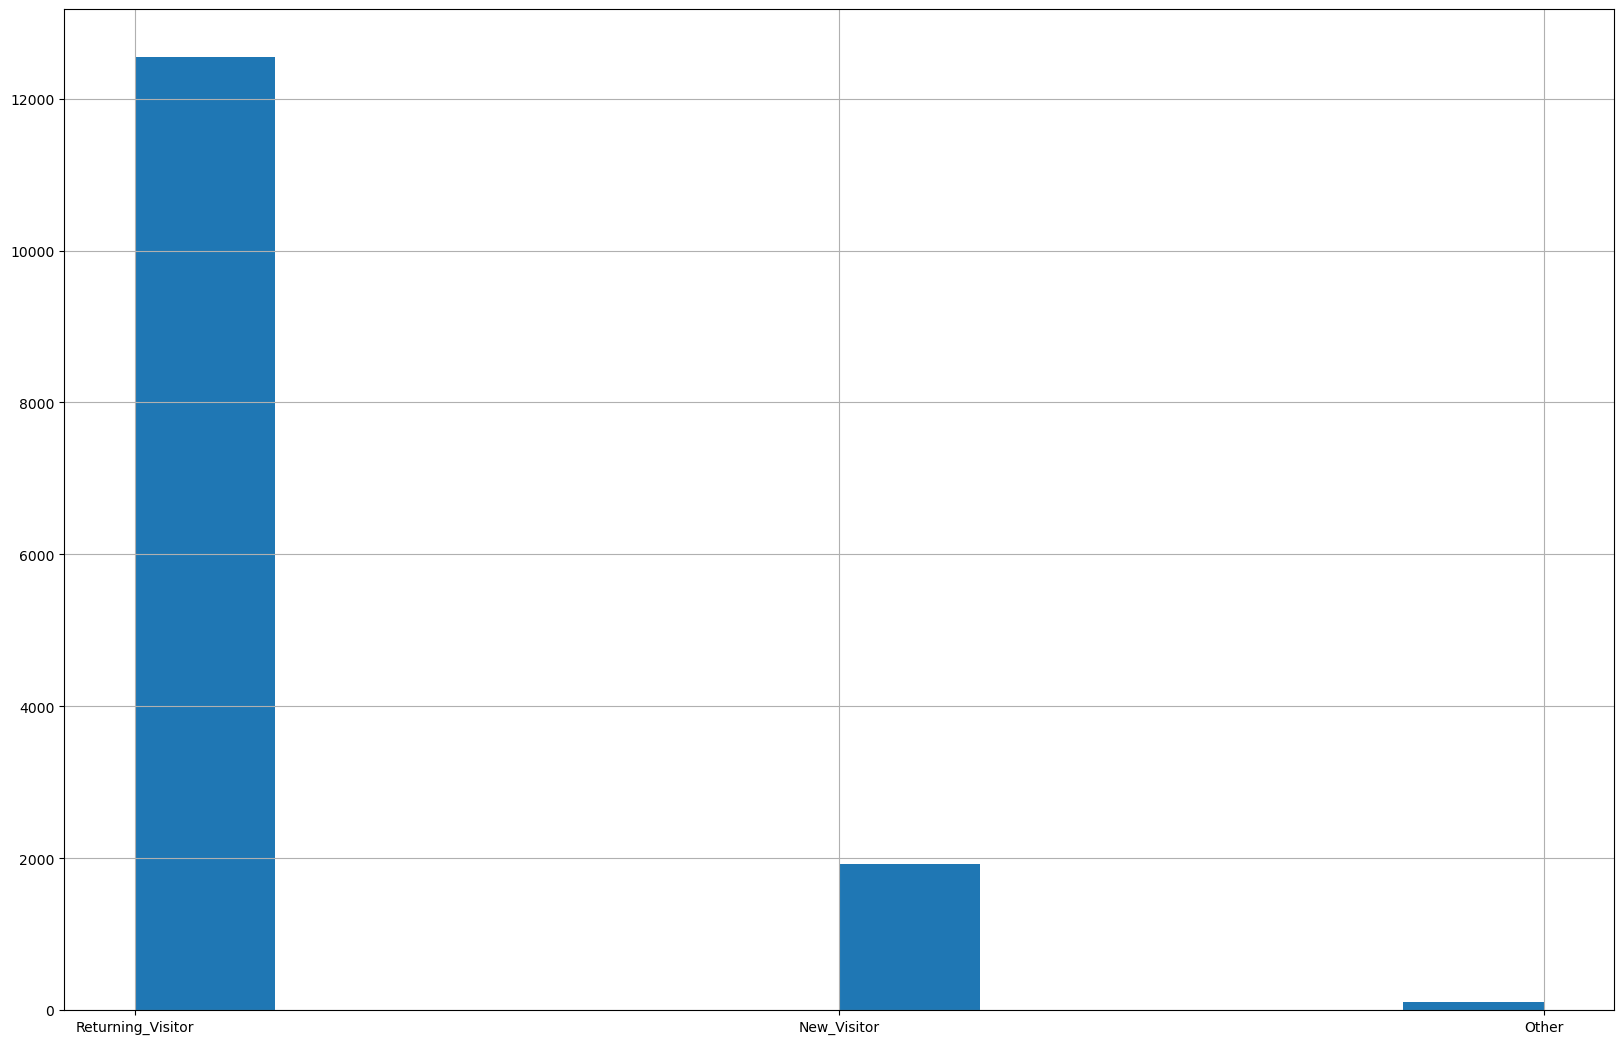

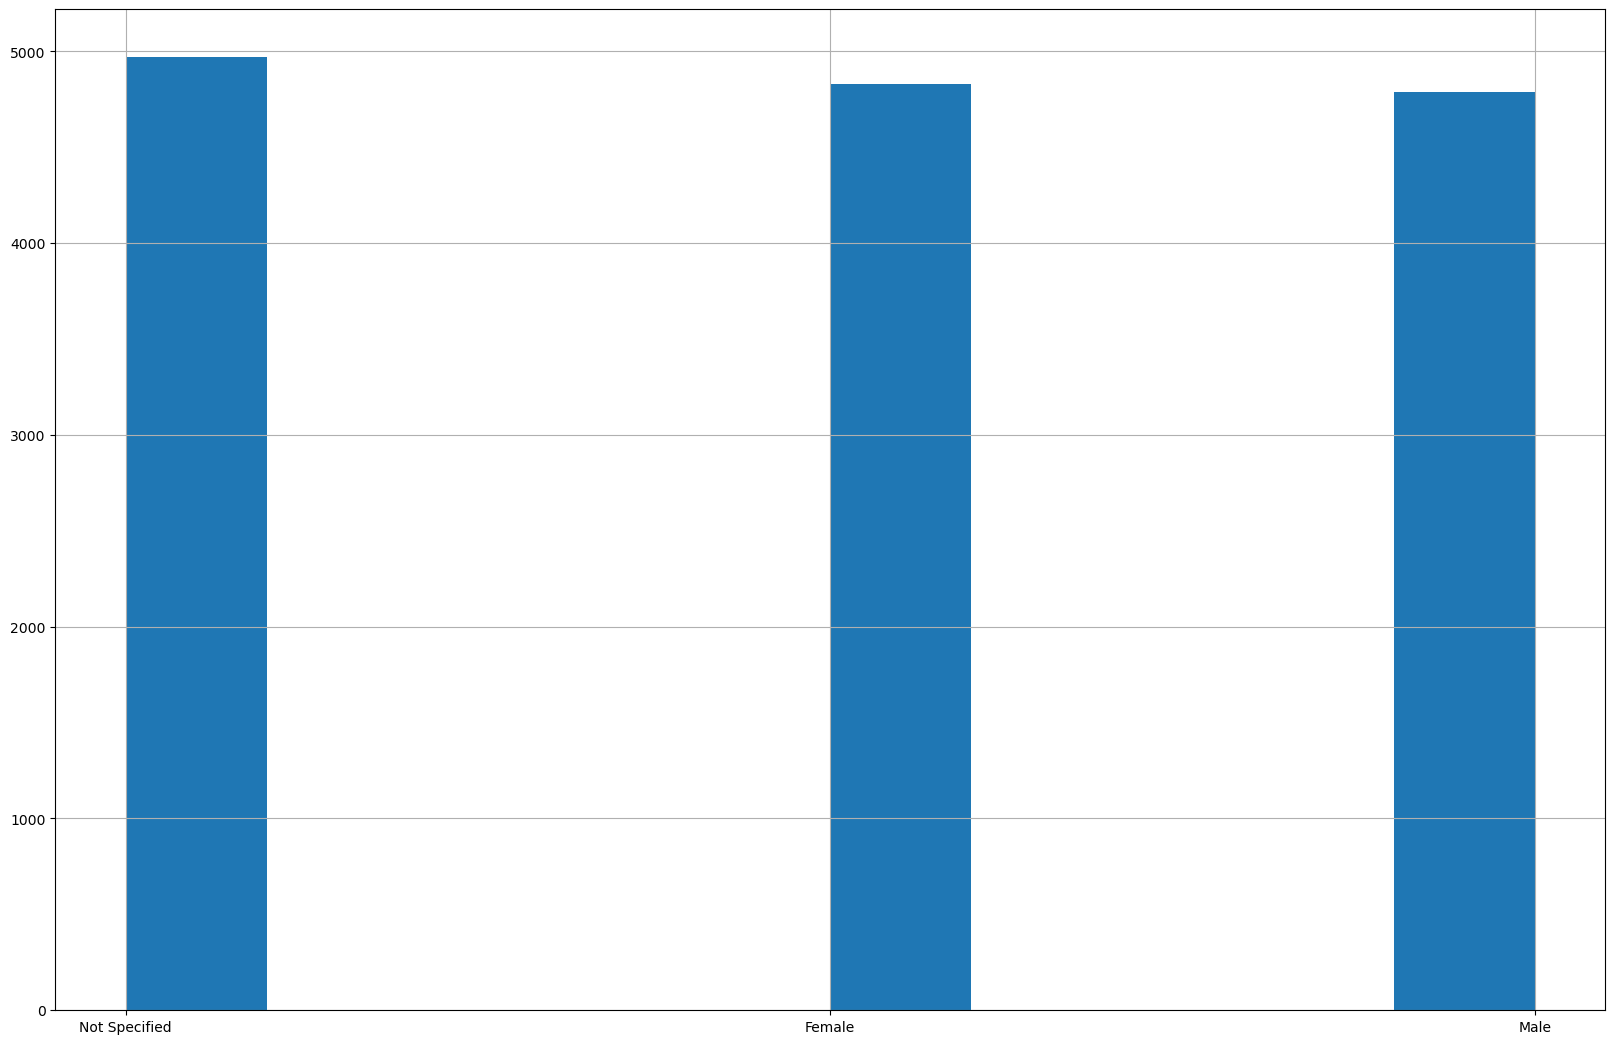

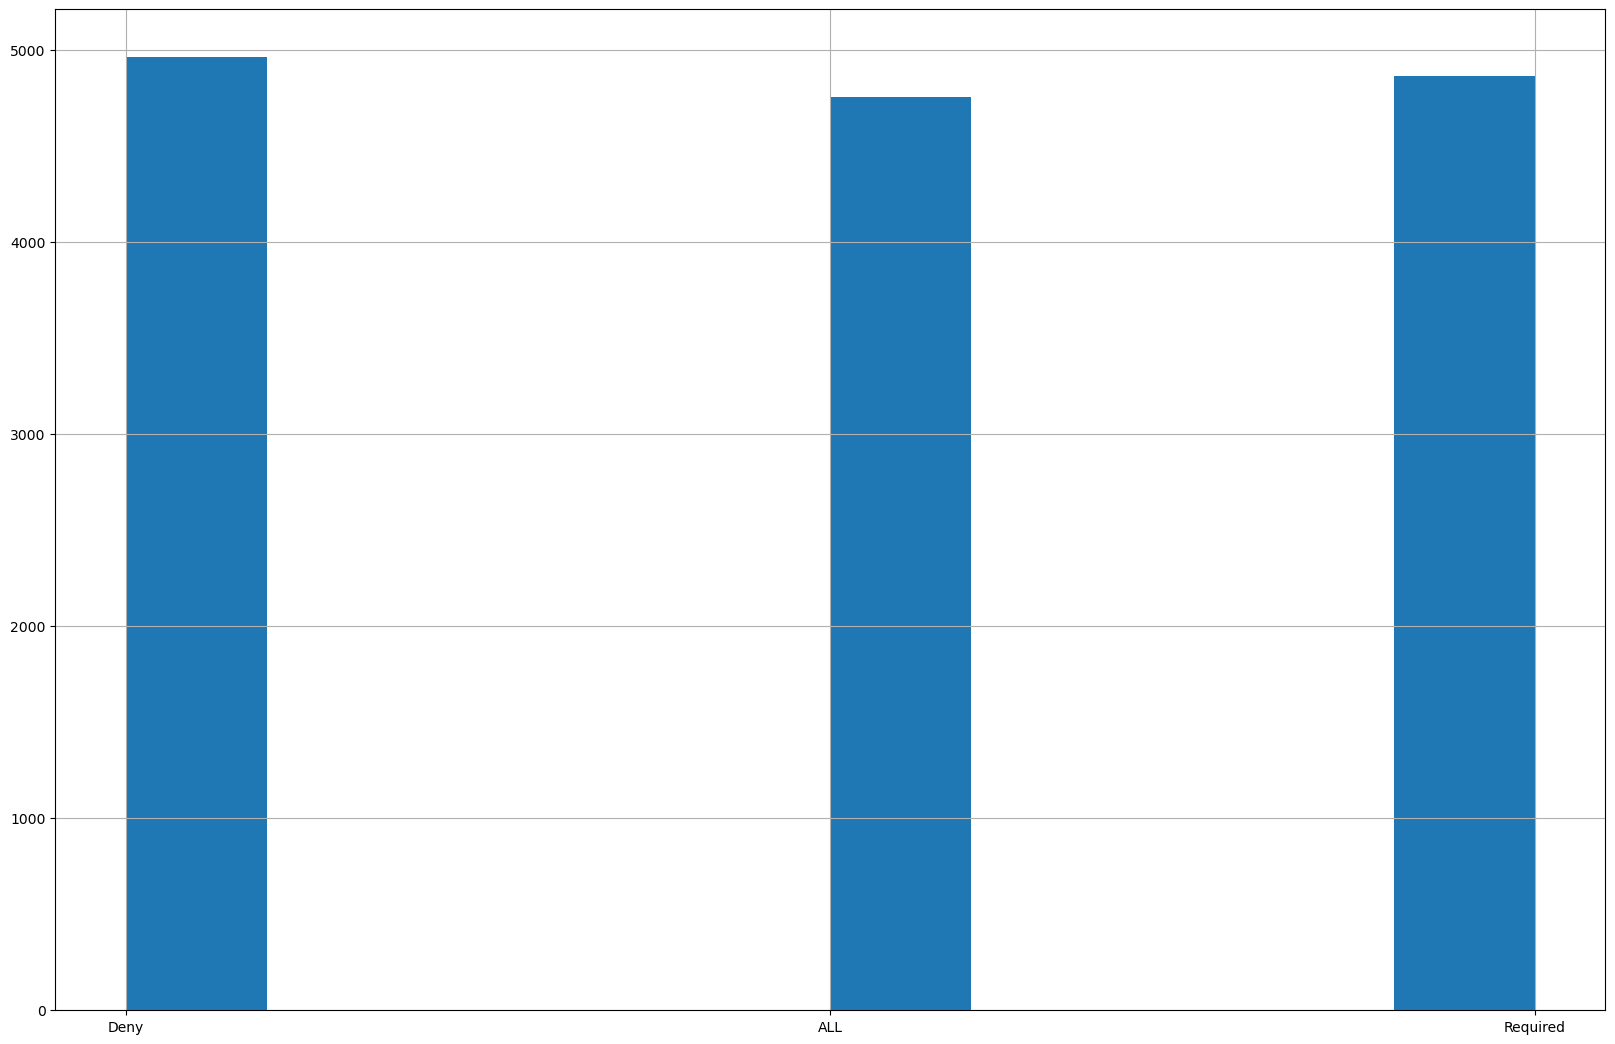

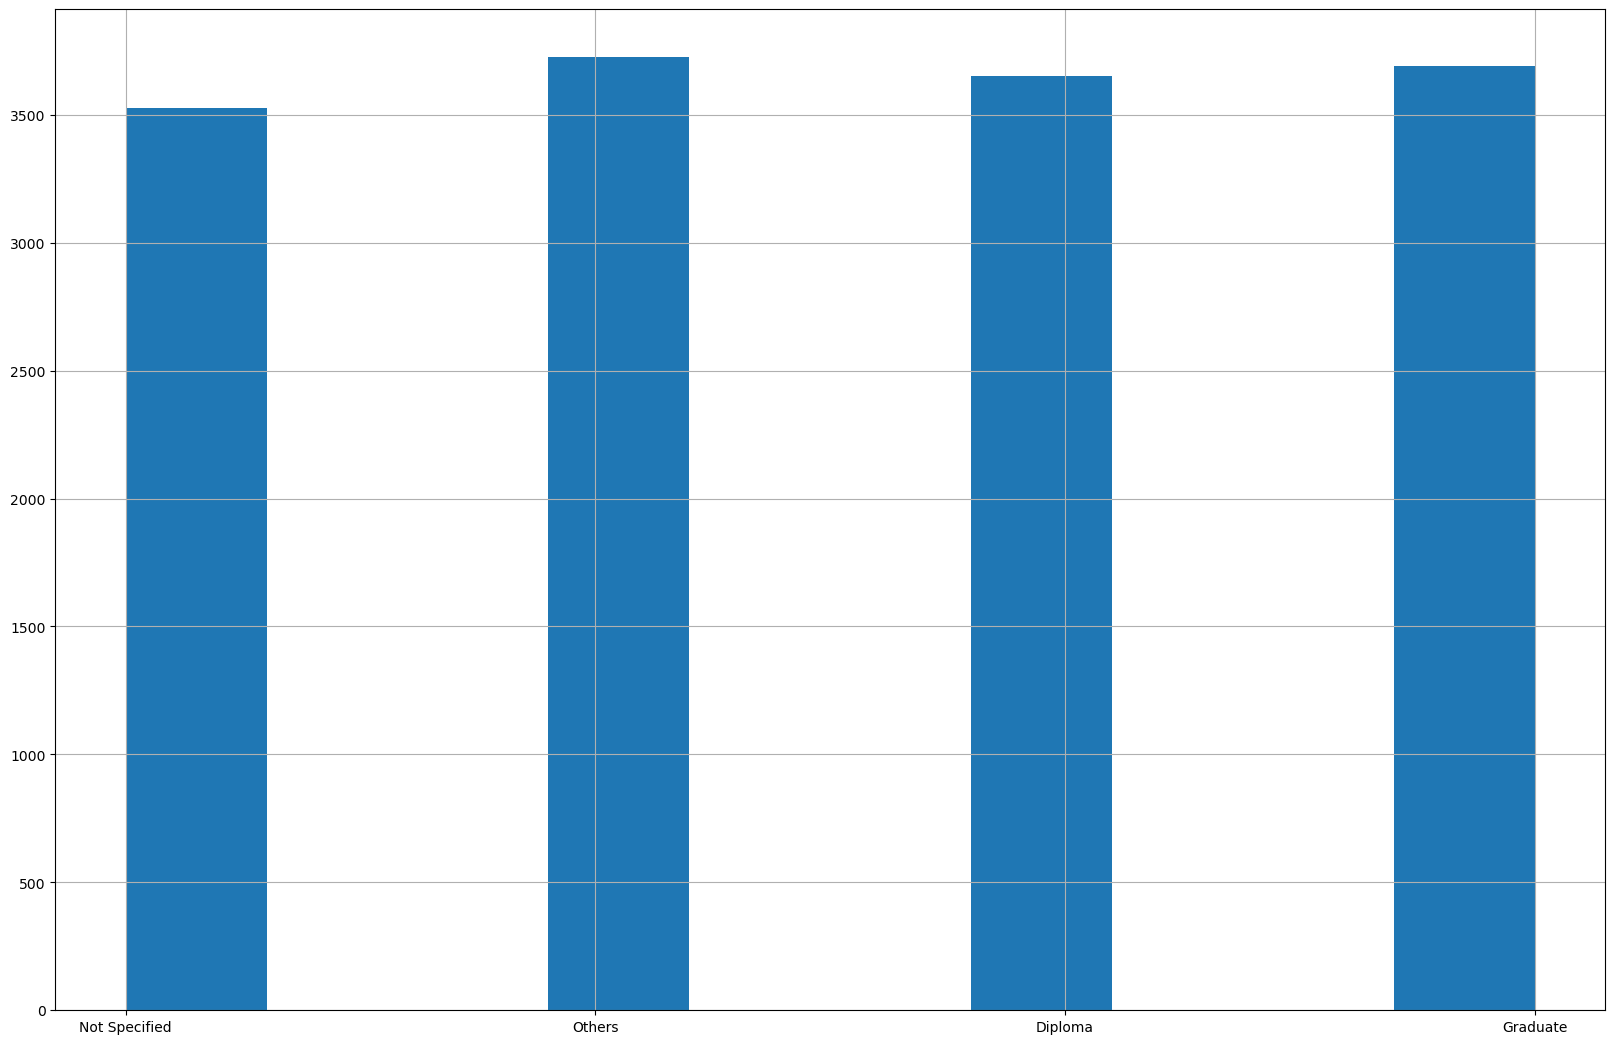

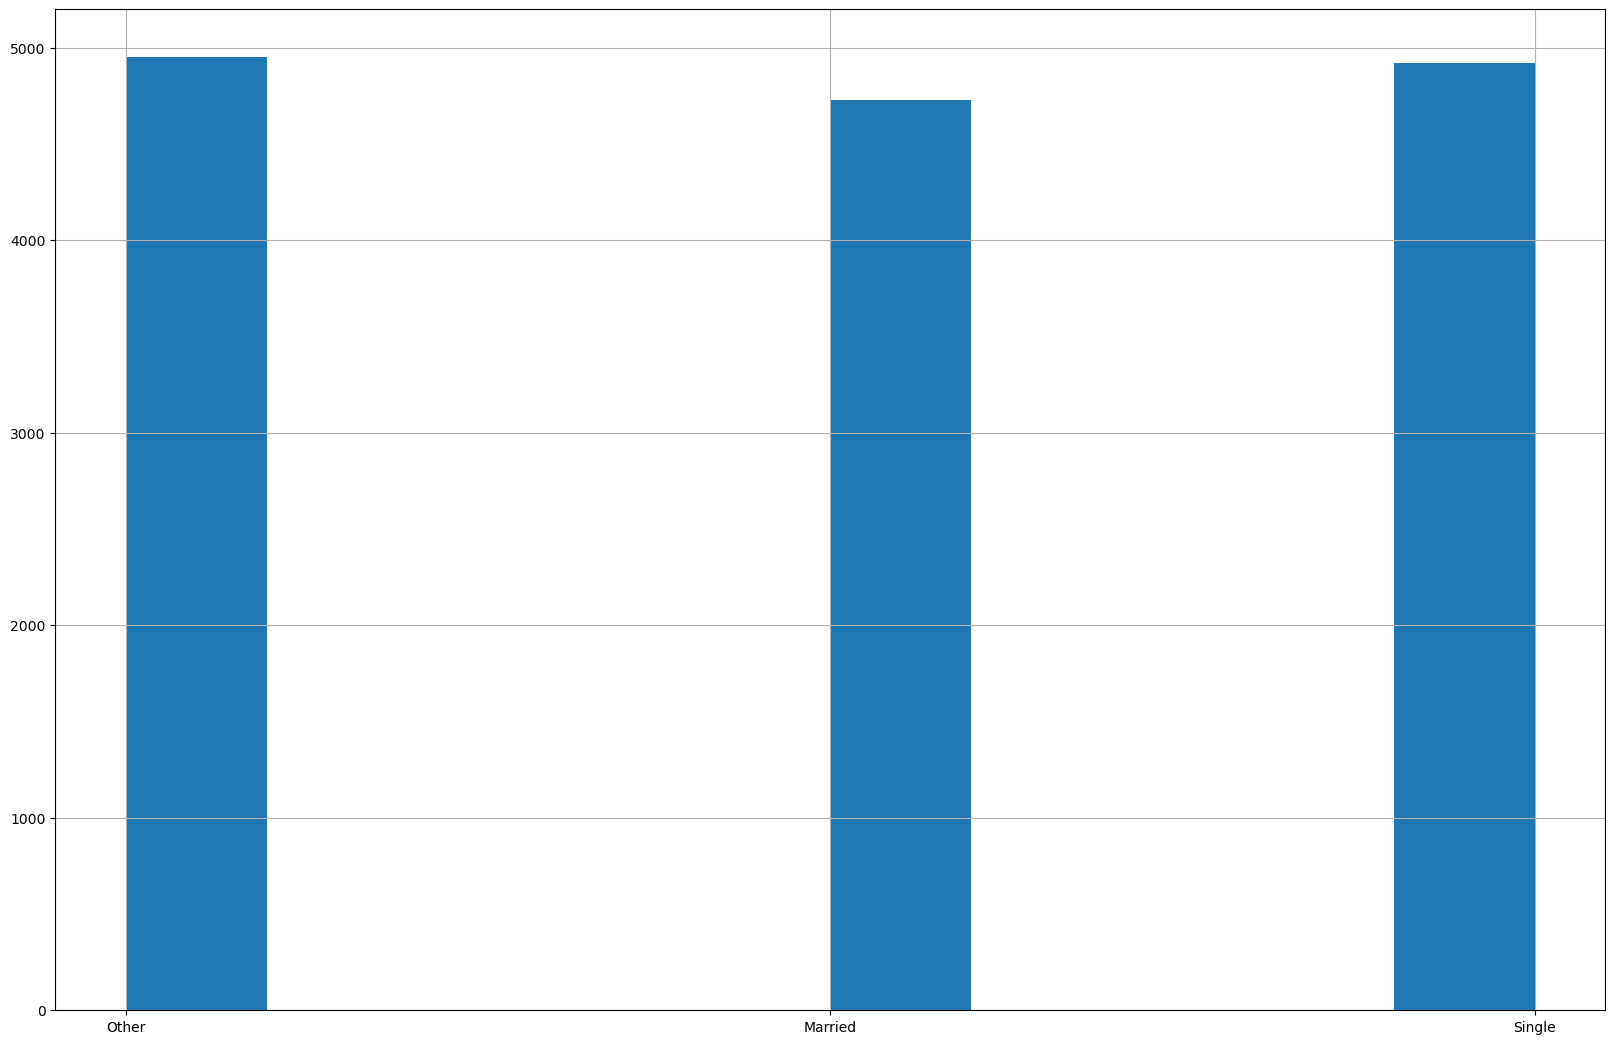

In [15]:
for col in data.select_dtypes(include=['object']):
    plt.figure()
    data[col].hist()
    plt.show()

In [16]:
# Find The Null Values
data.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

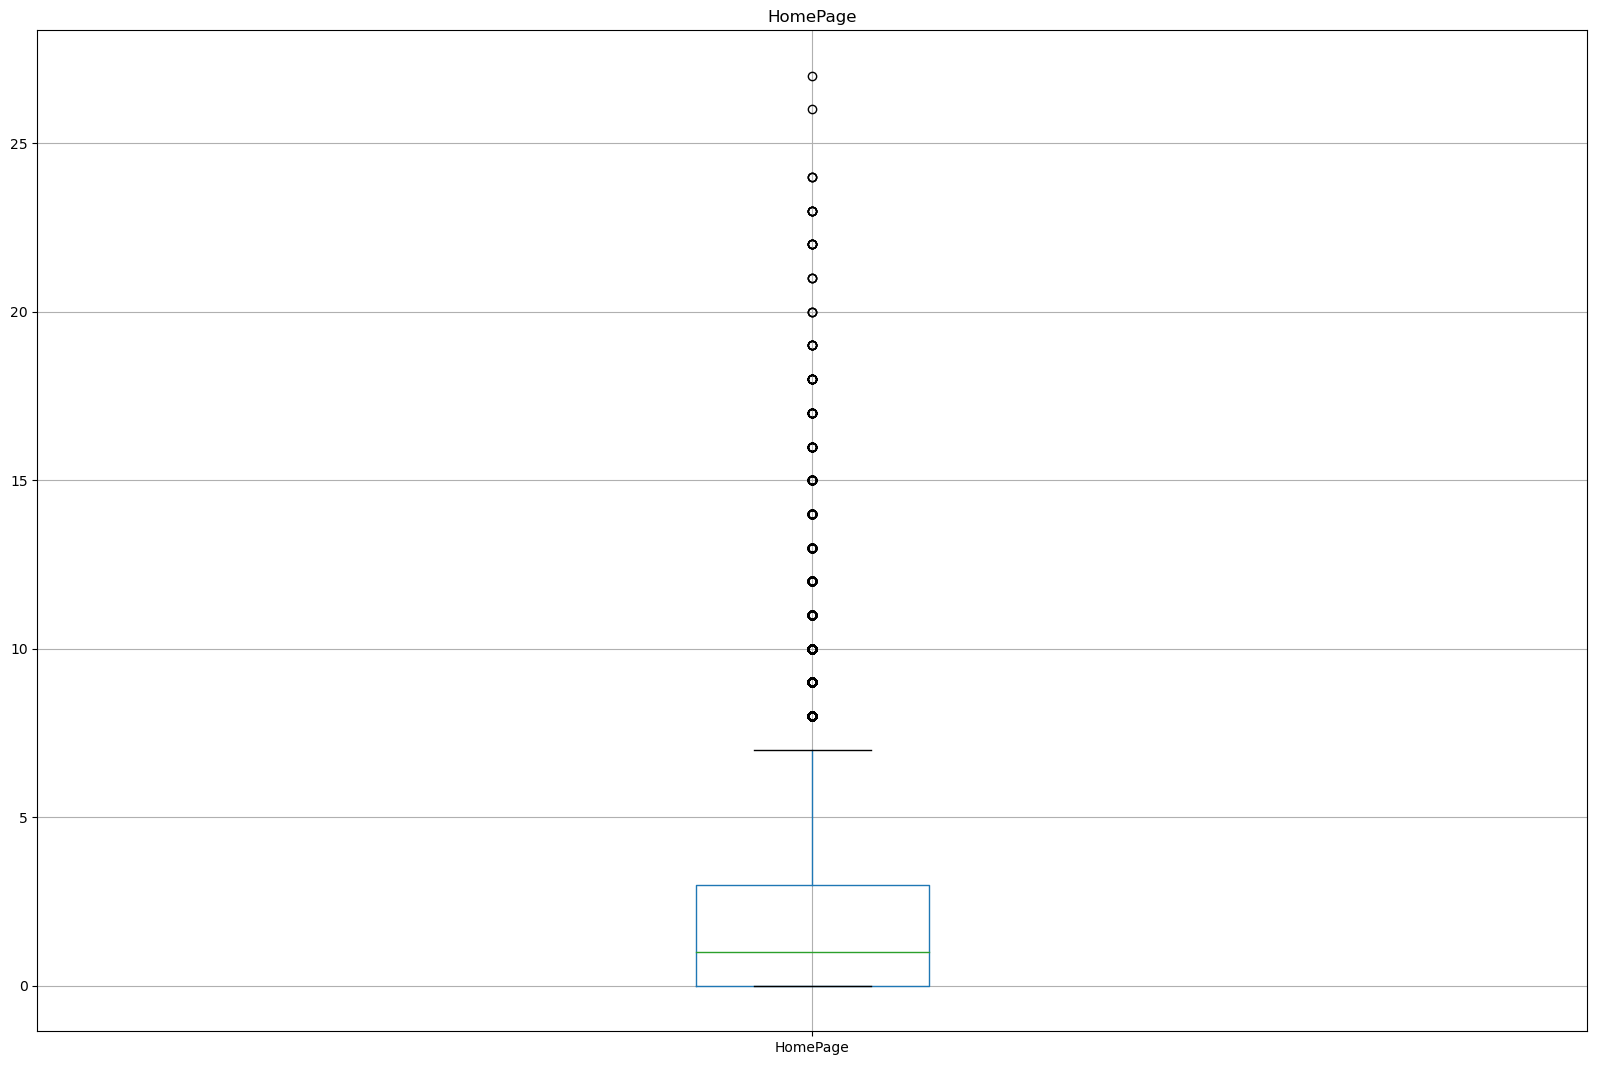

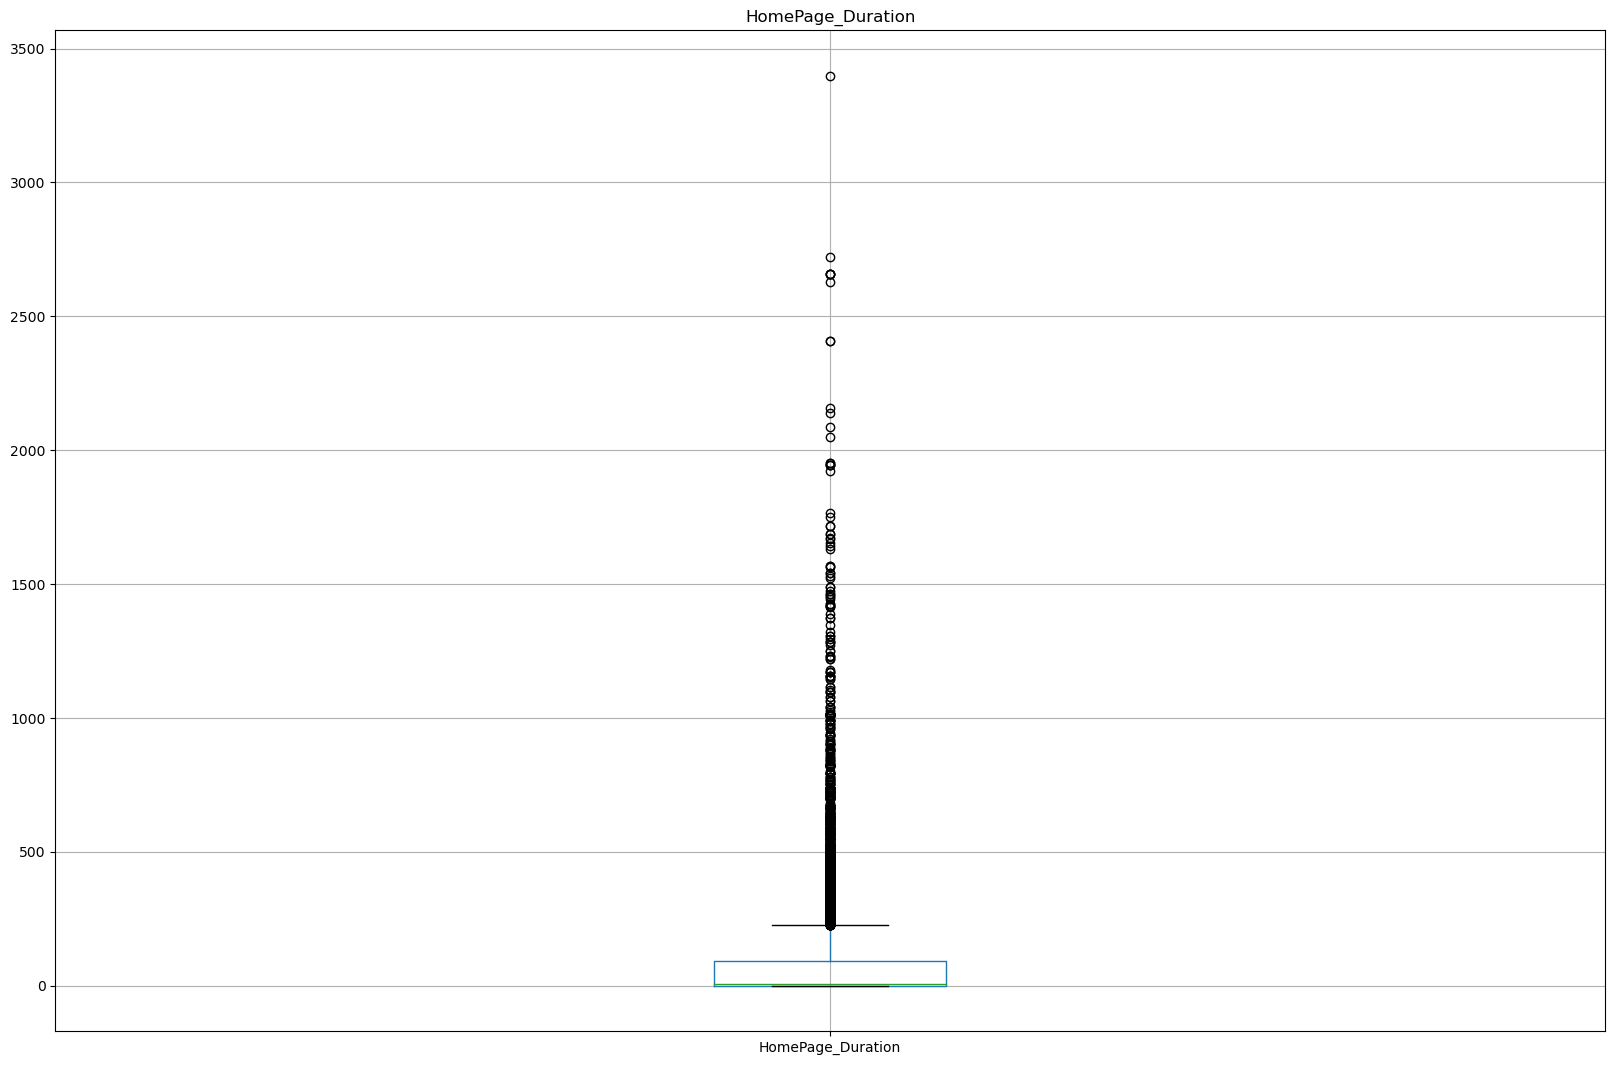

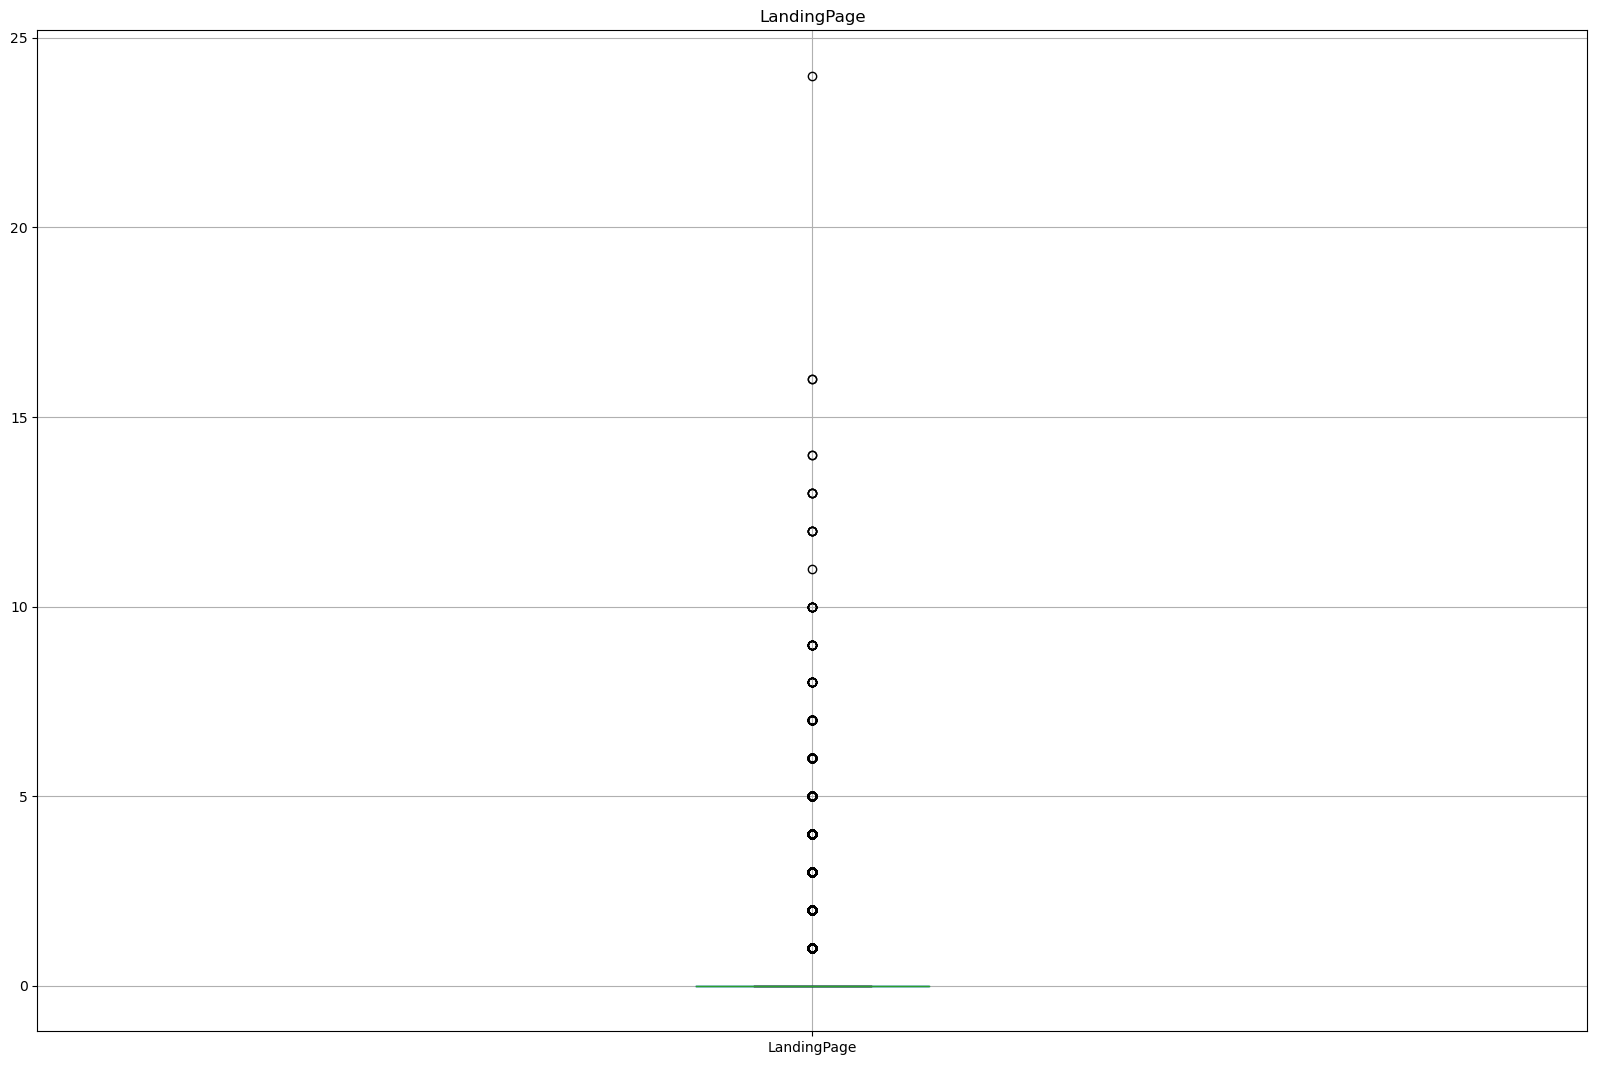

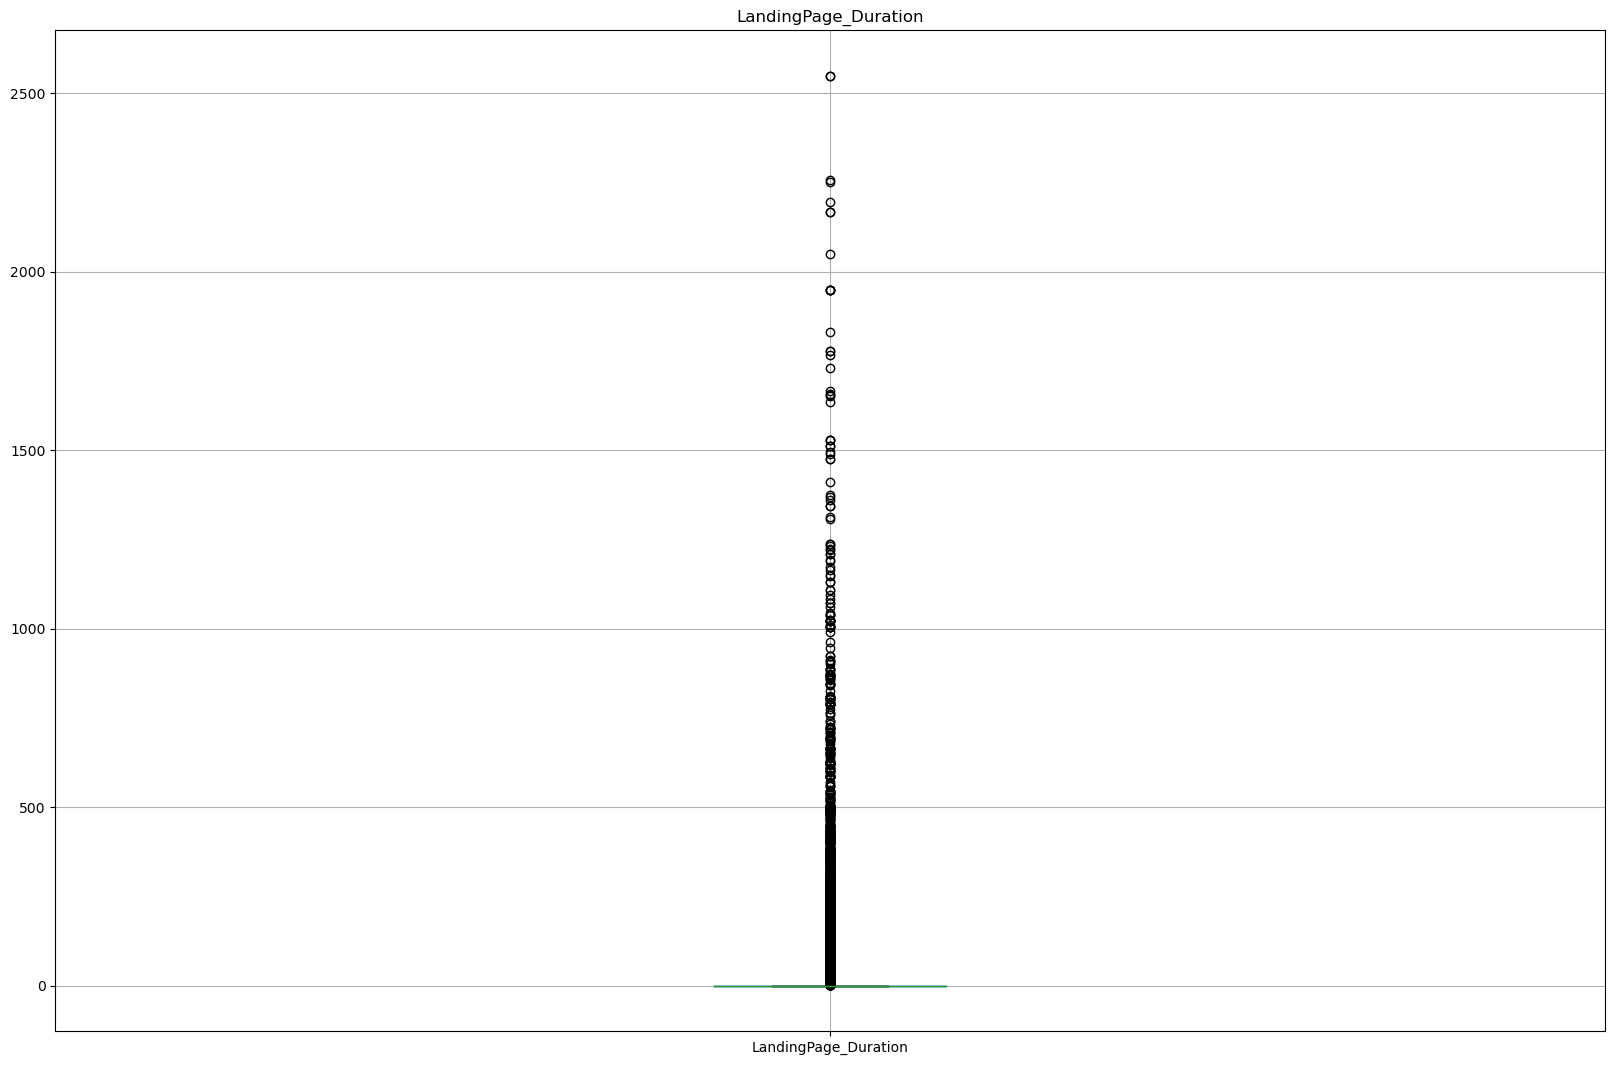

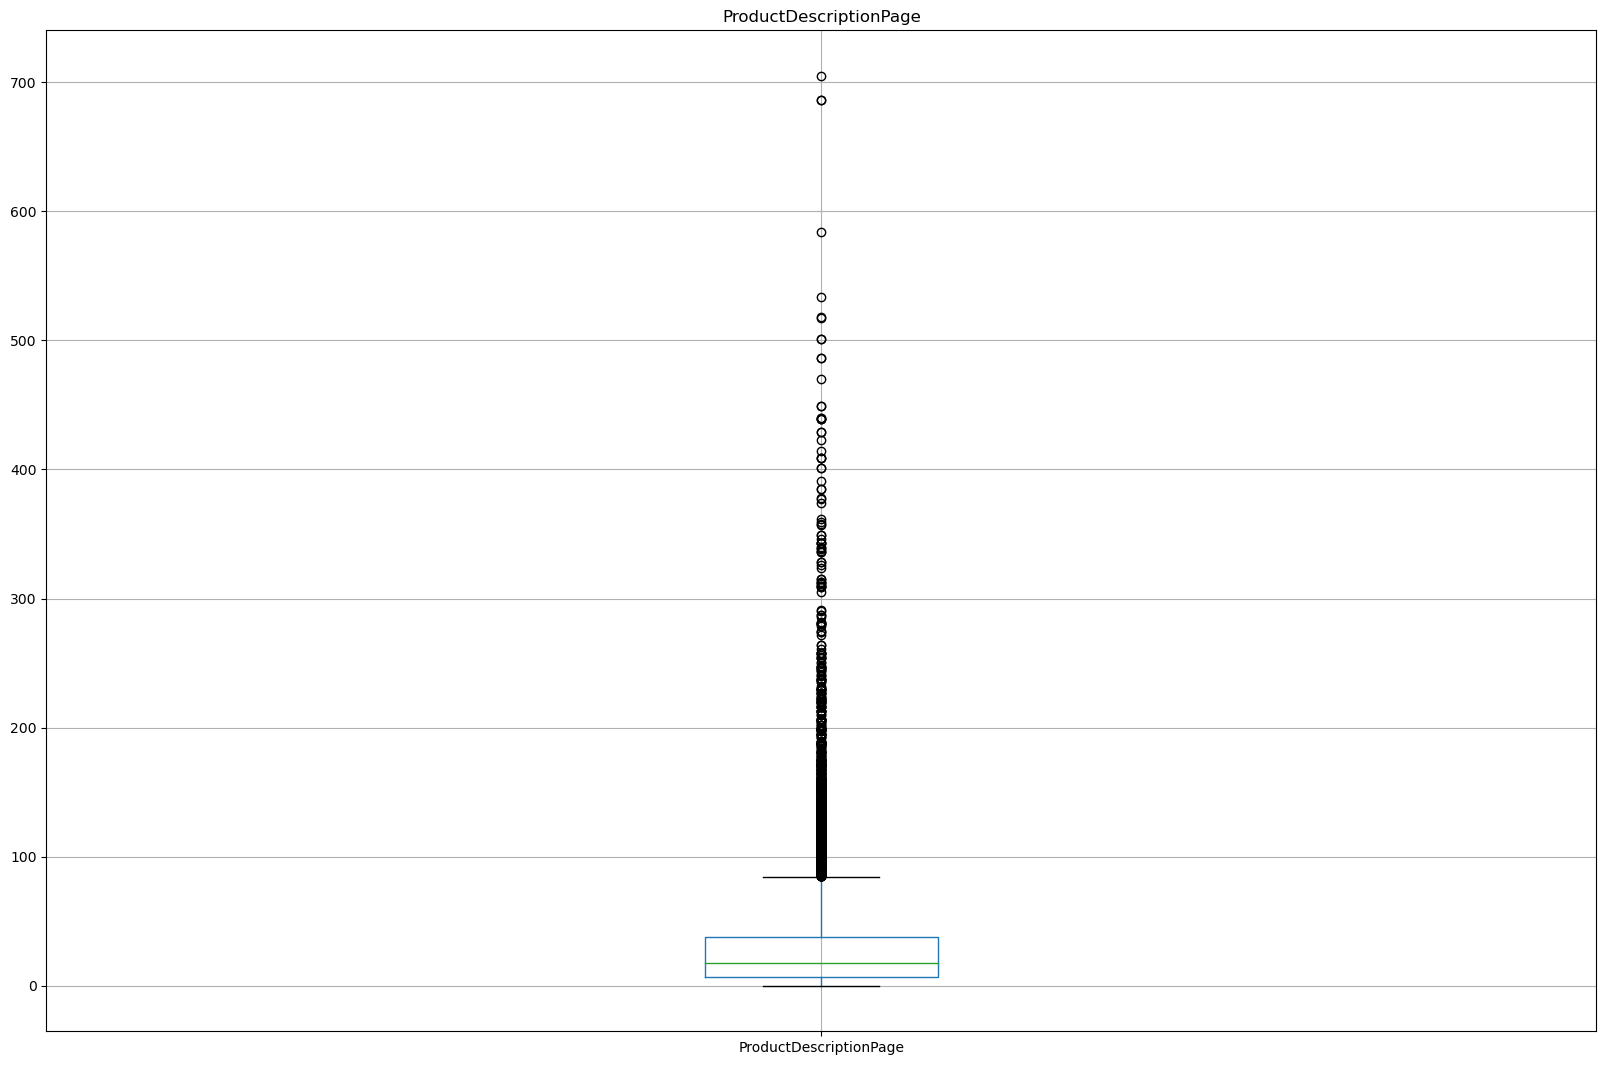

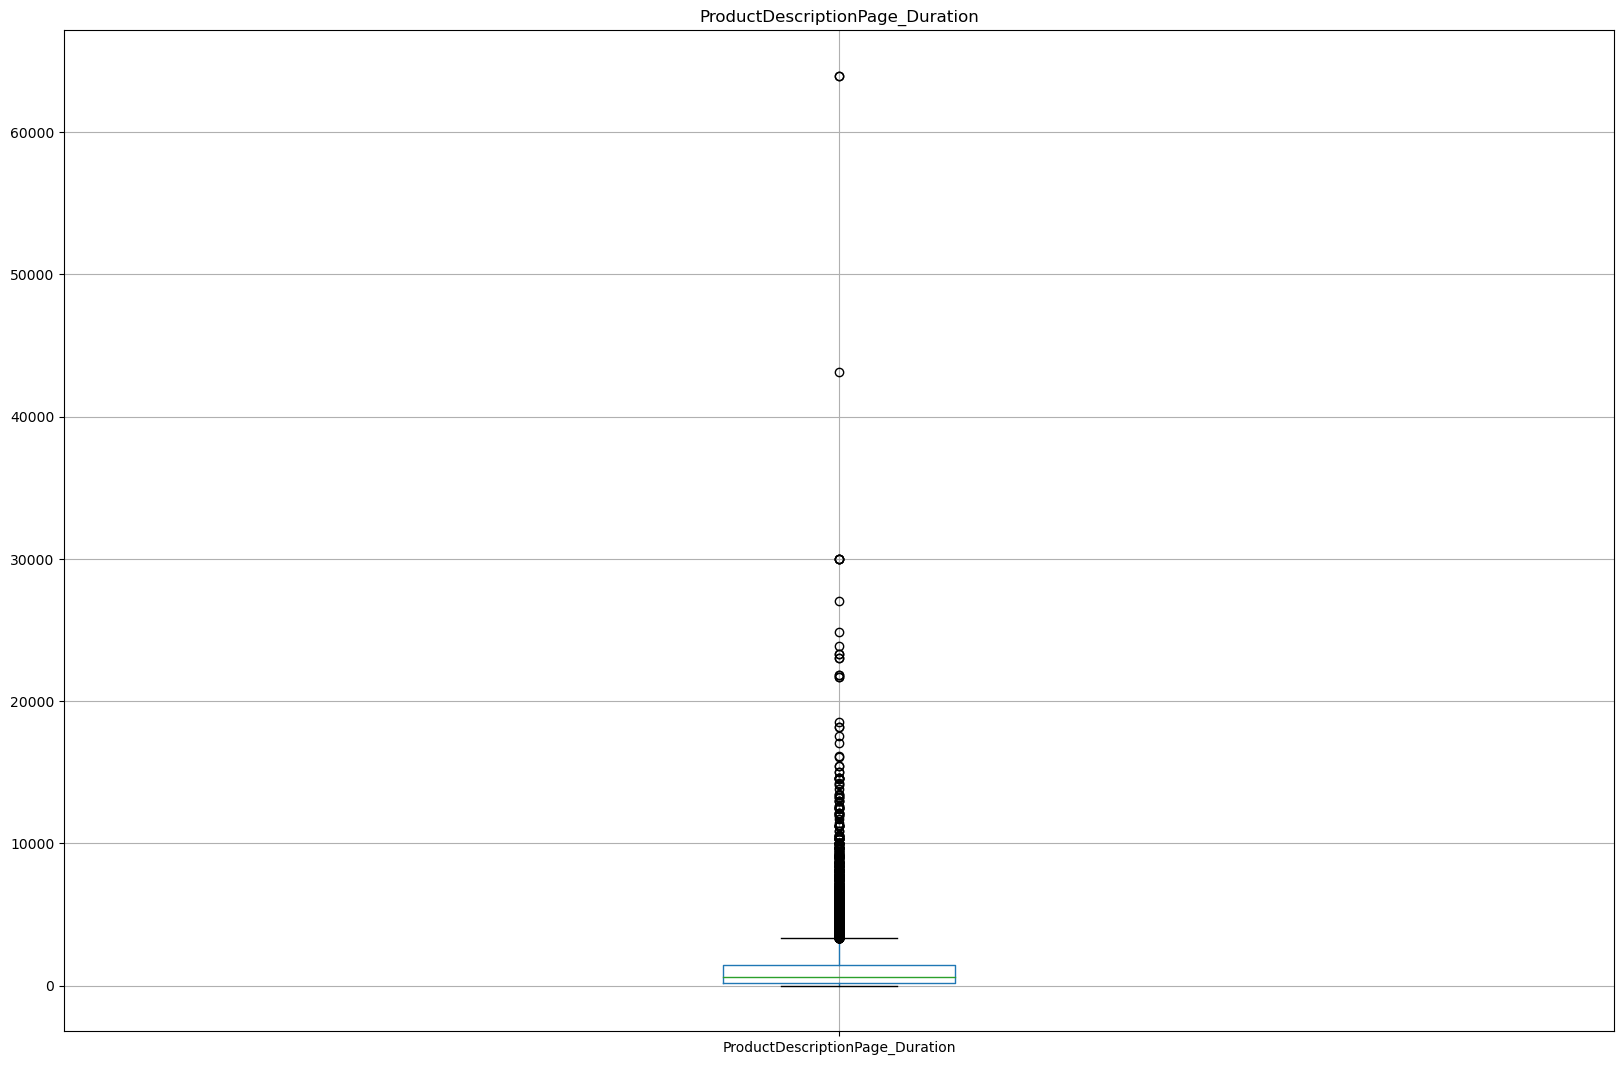

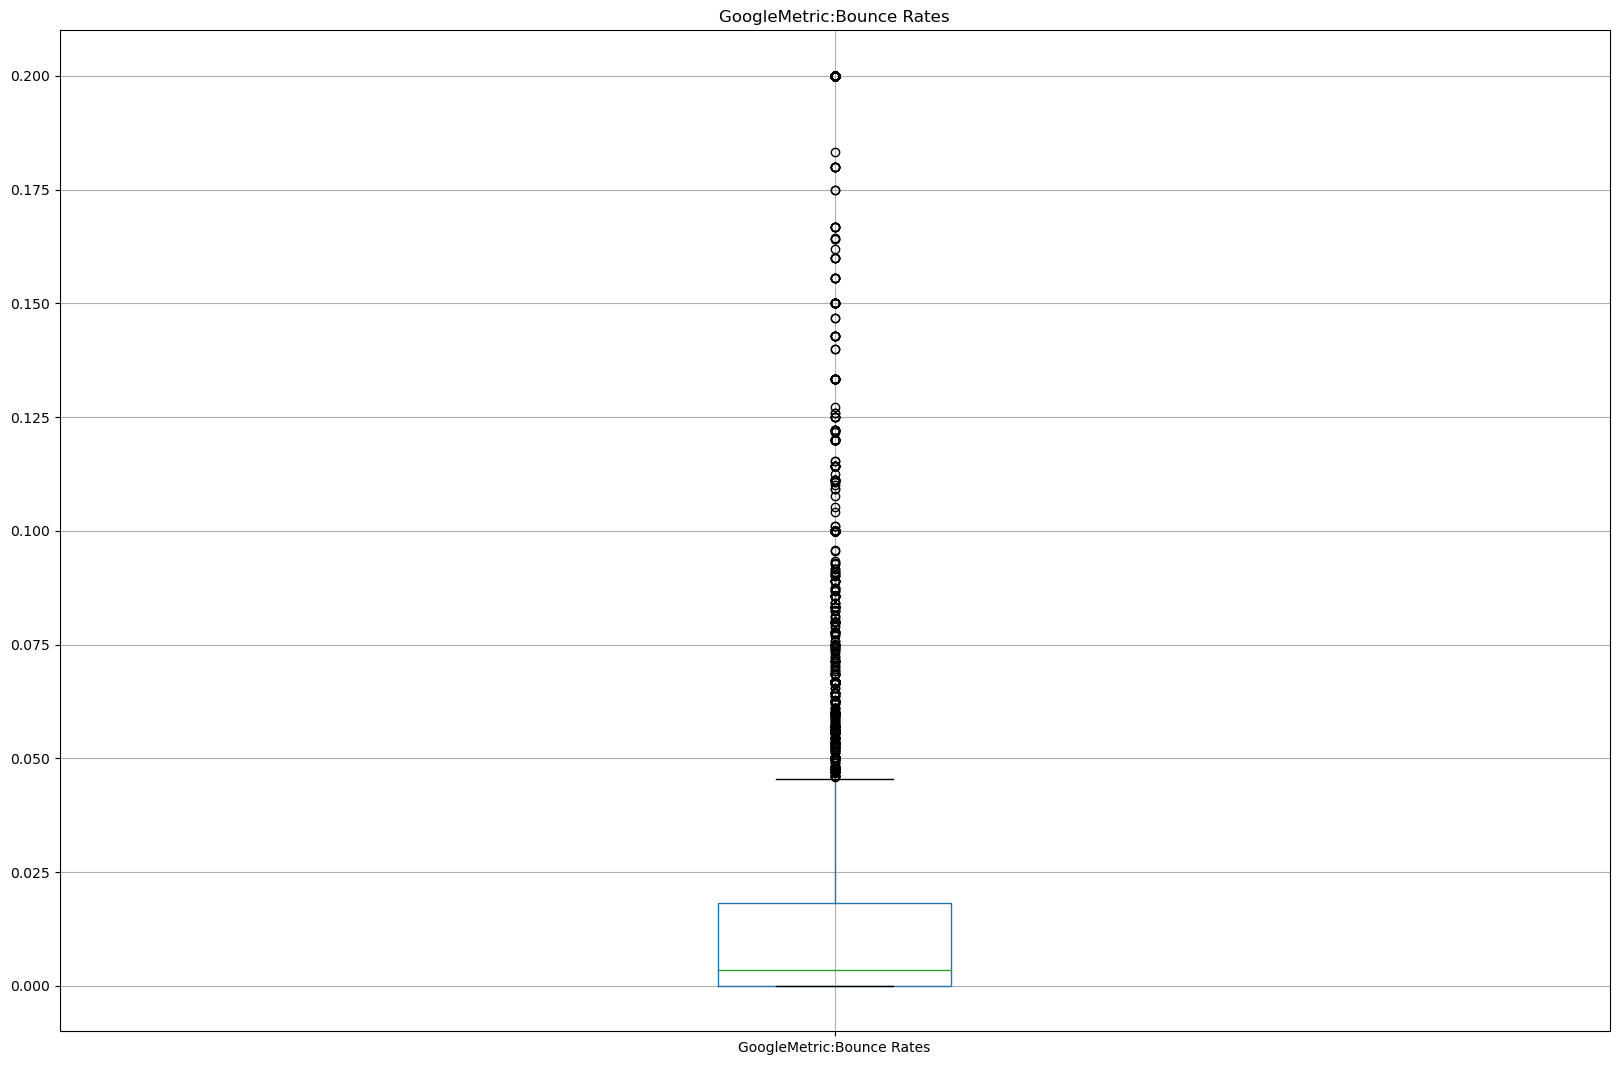

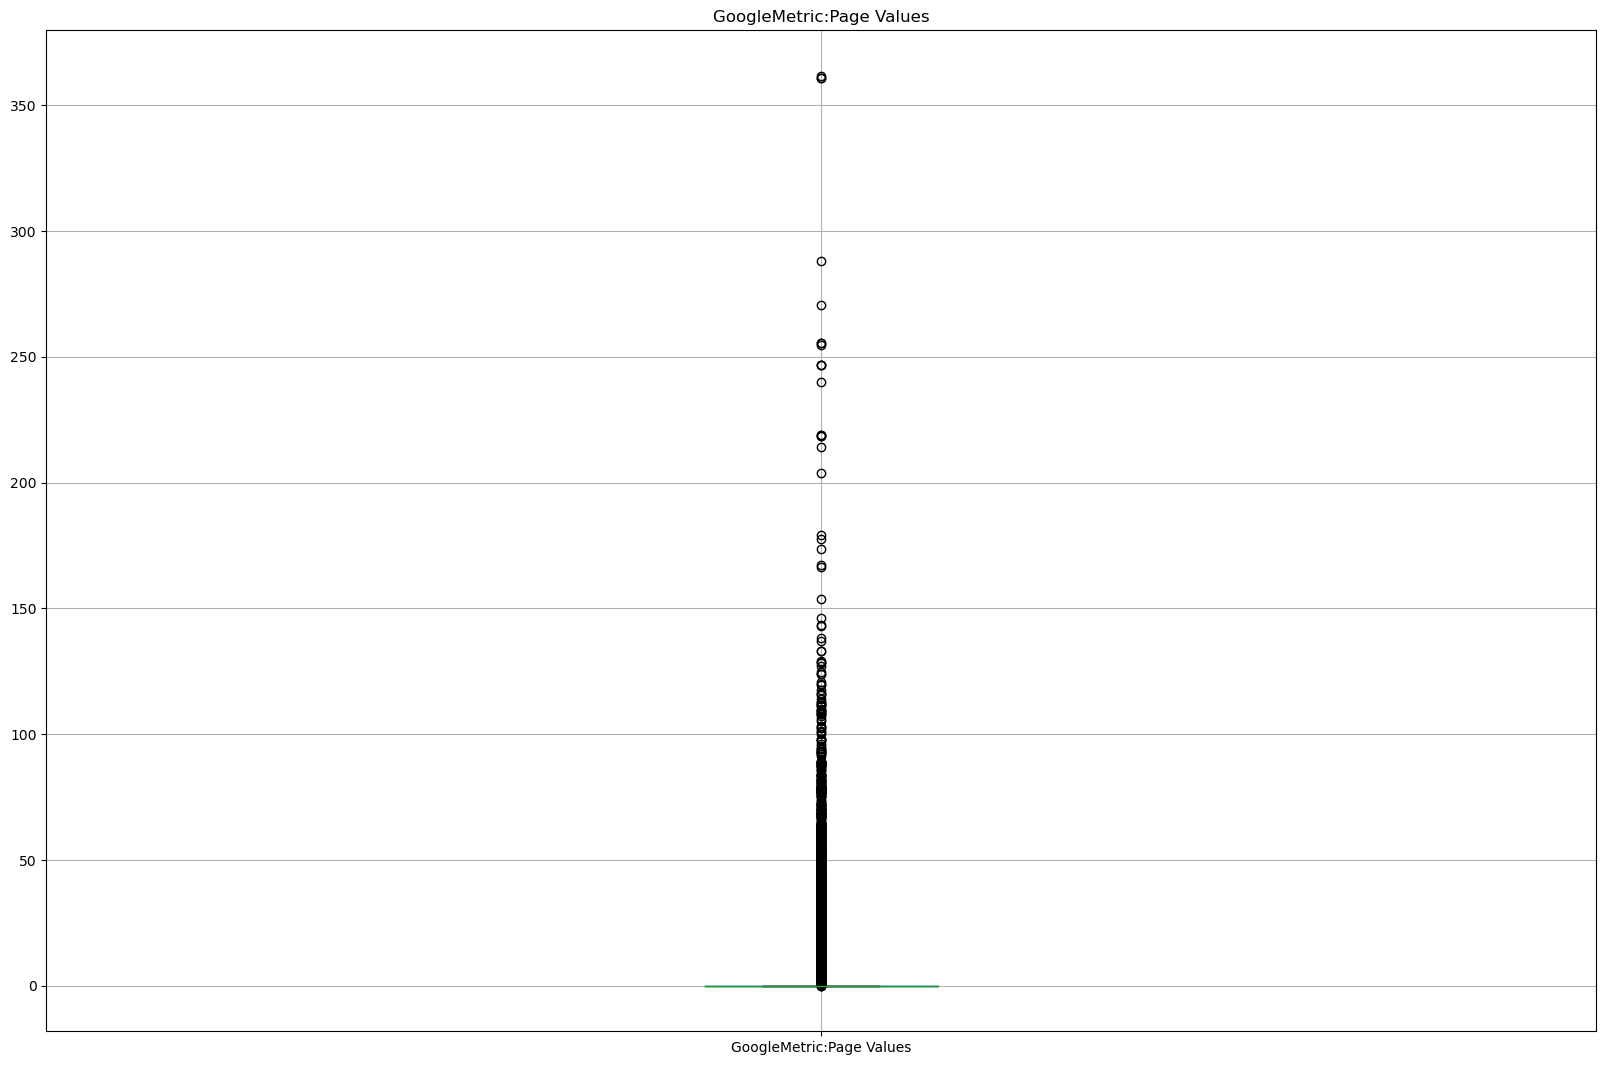

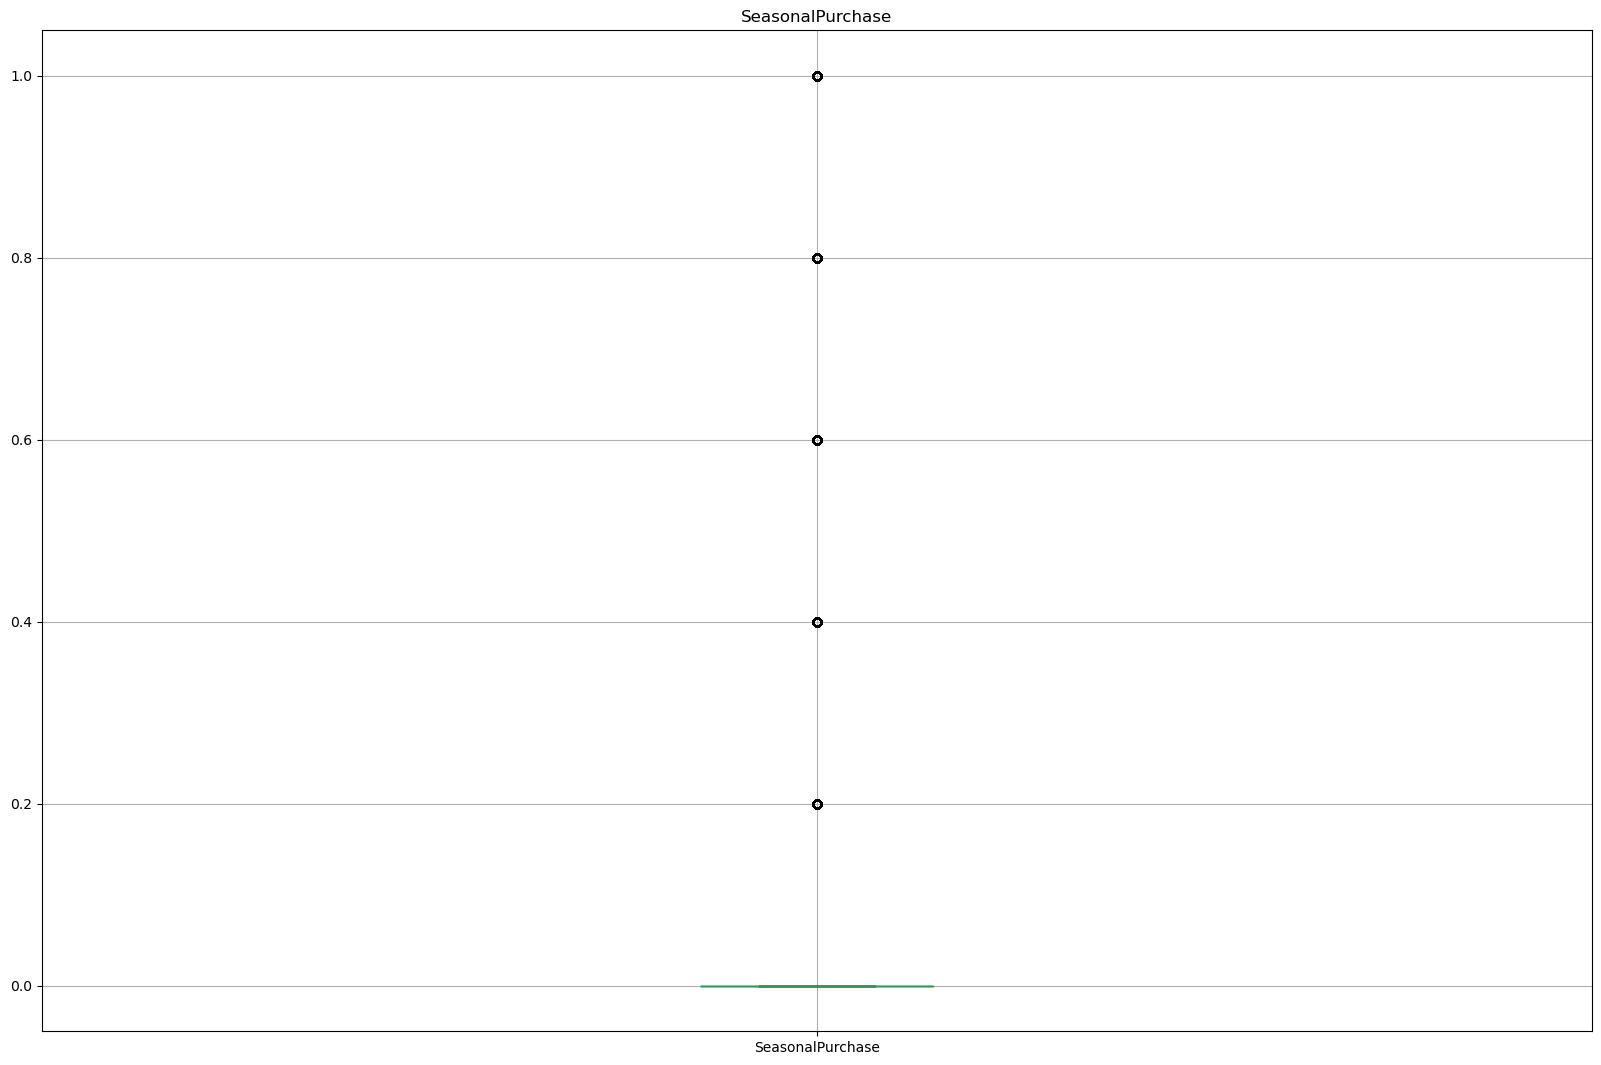

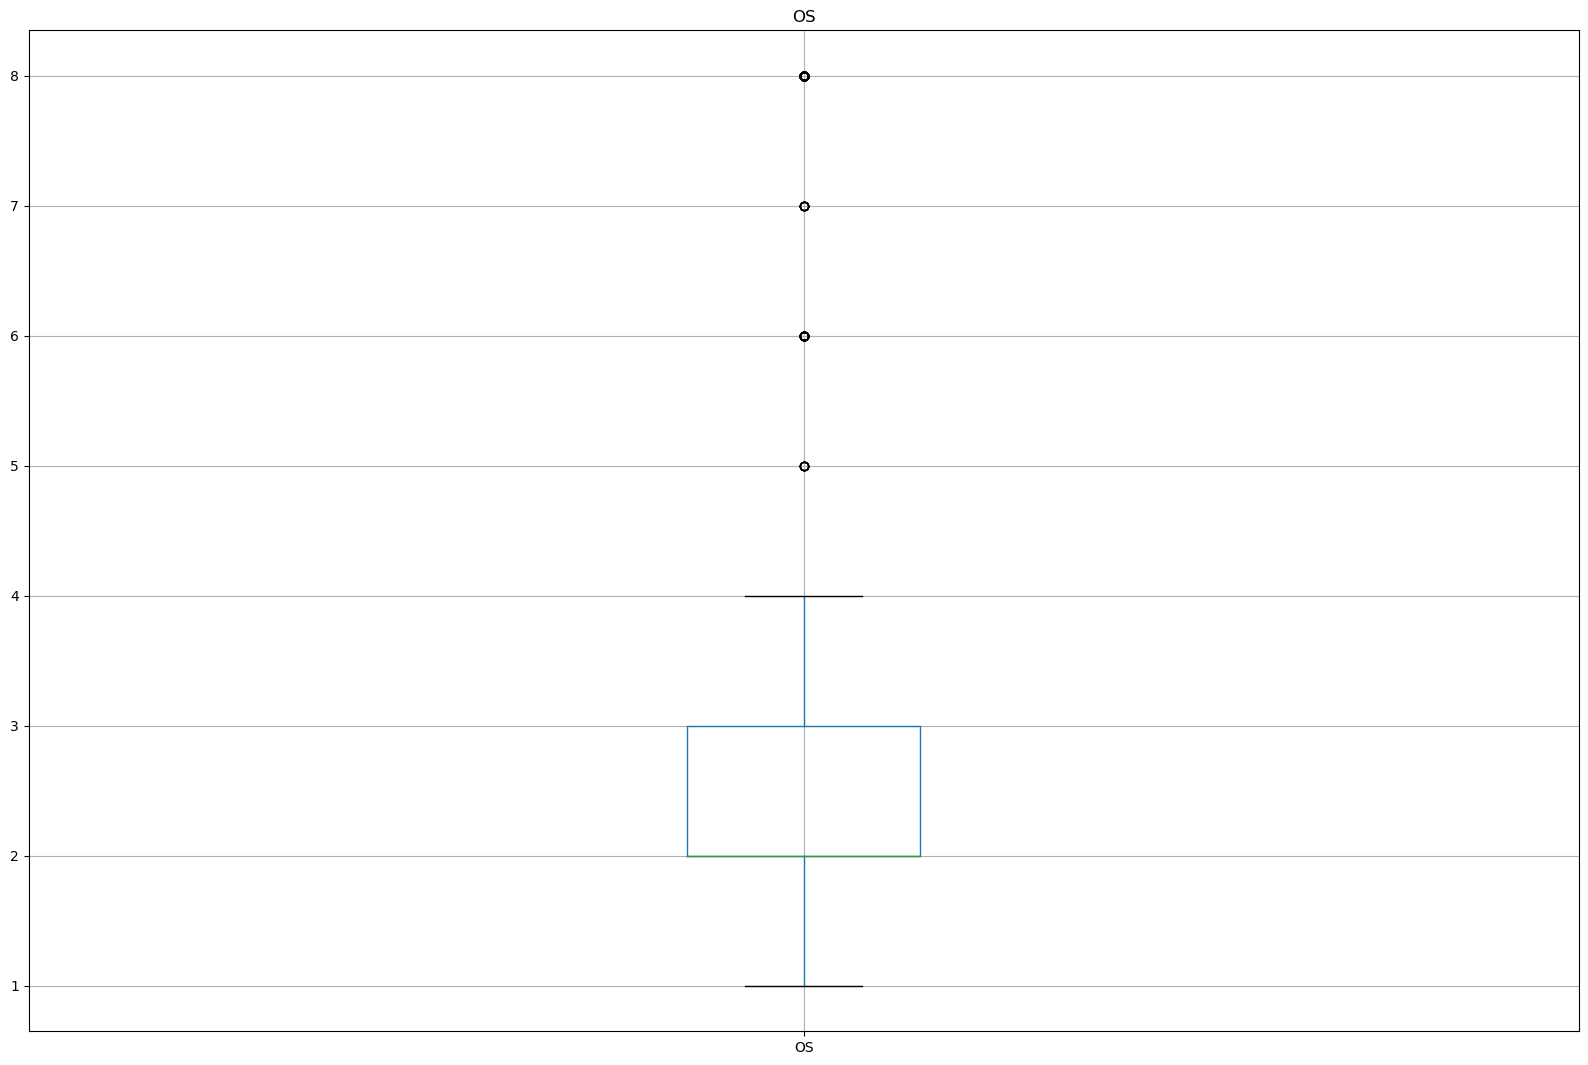

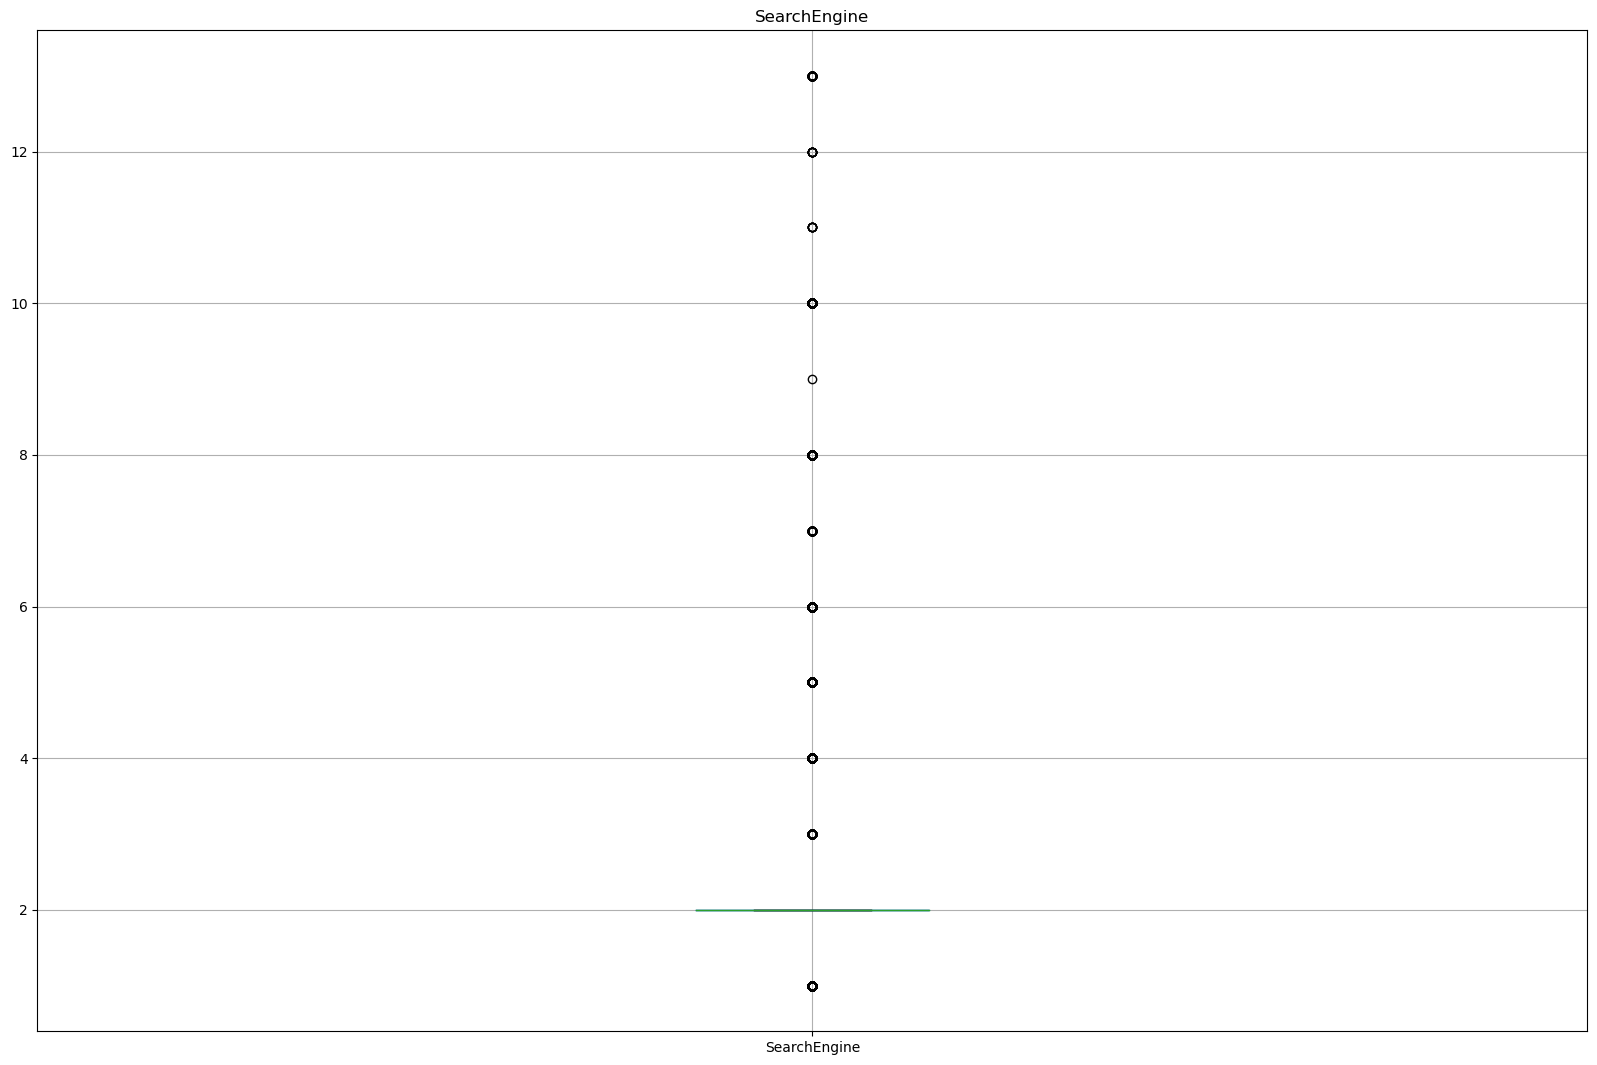

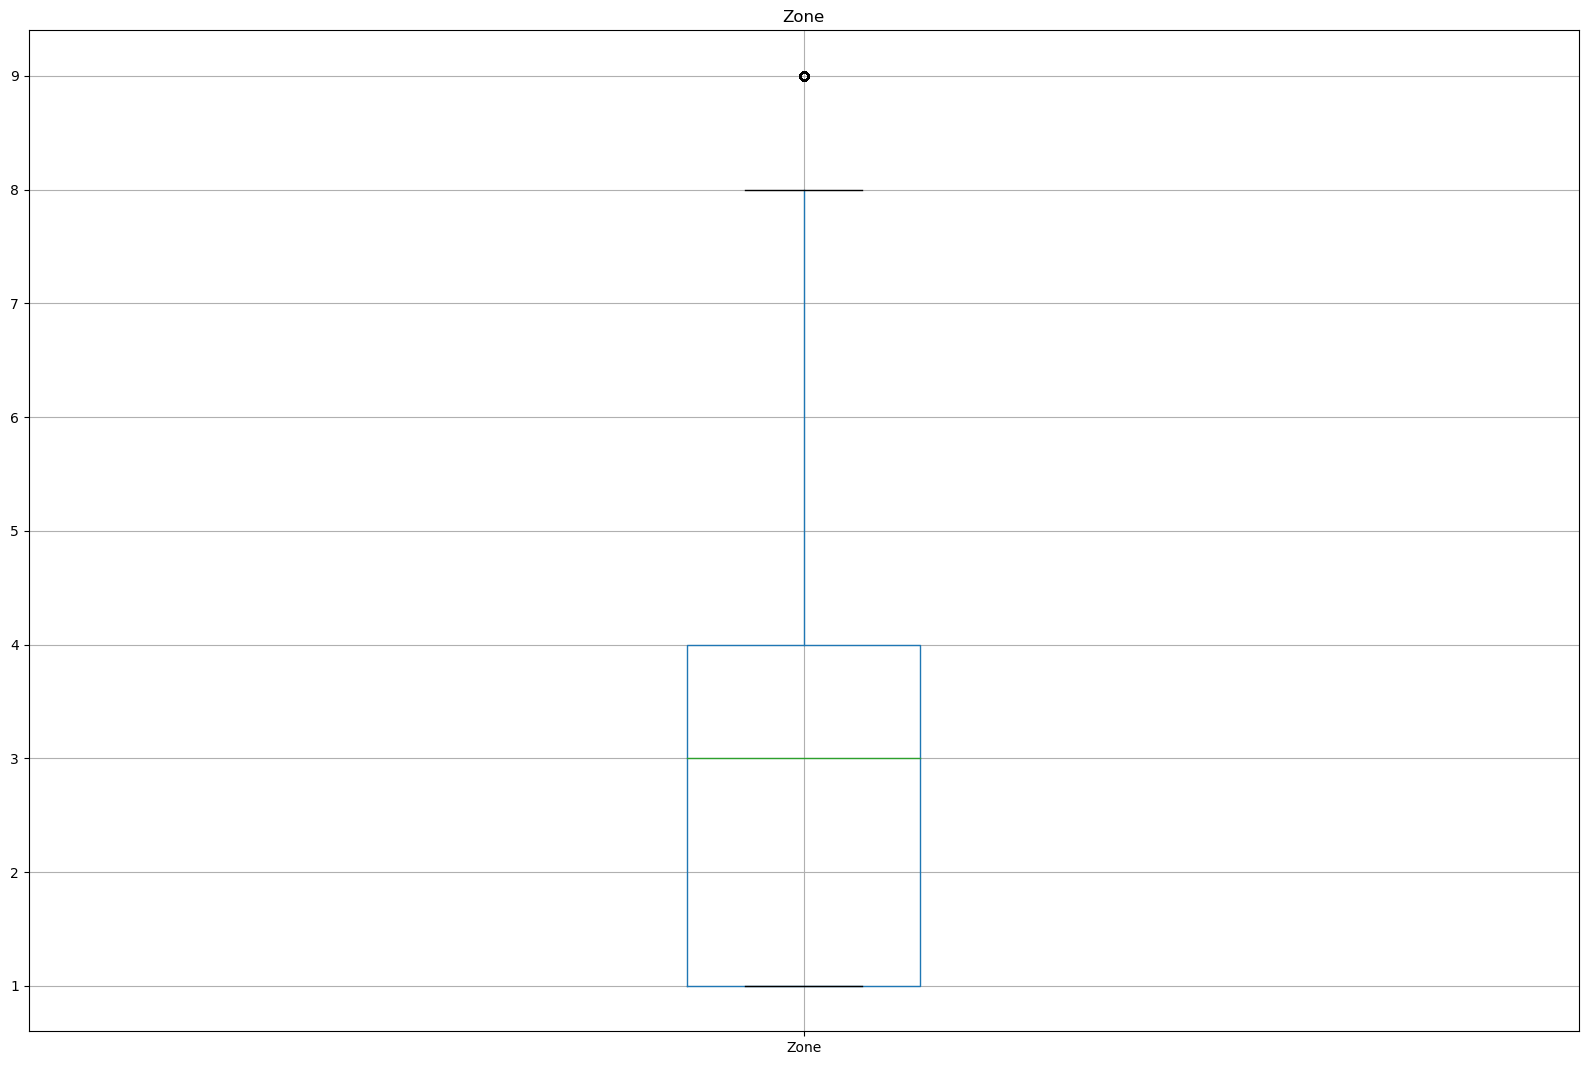

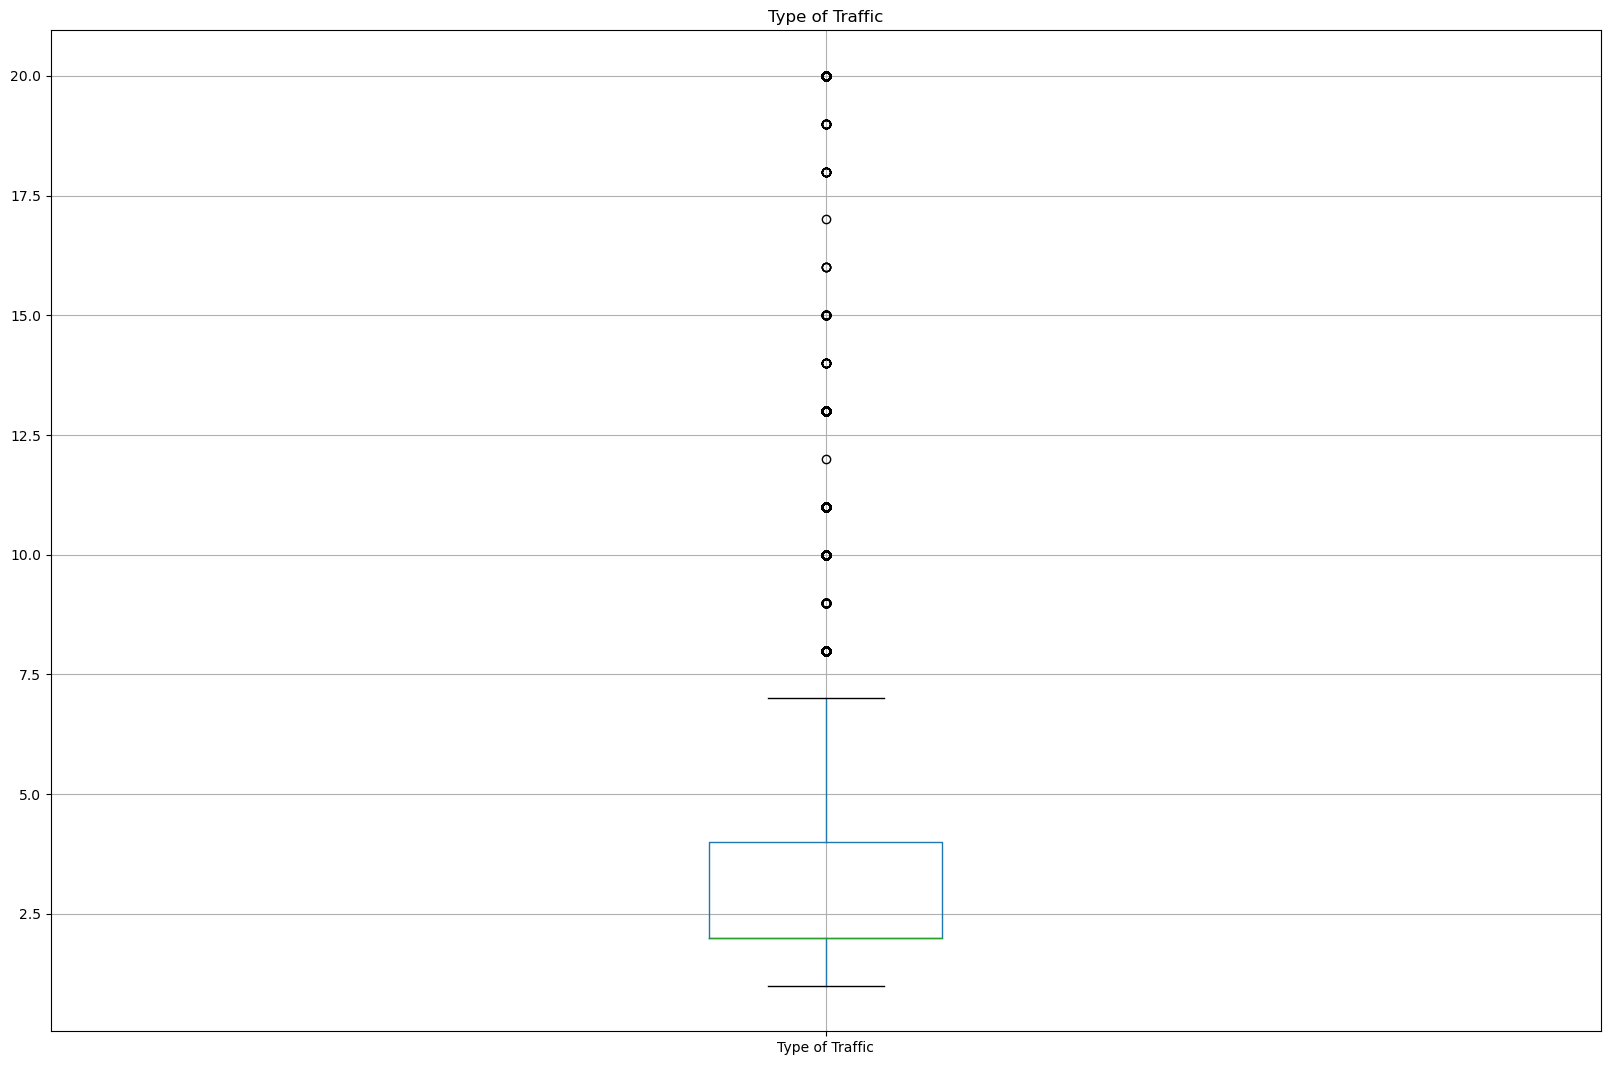

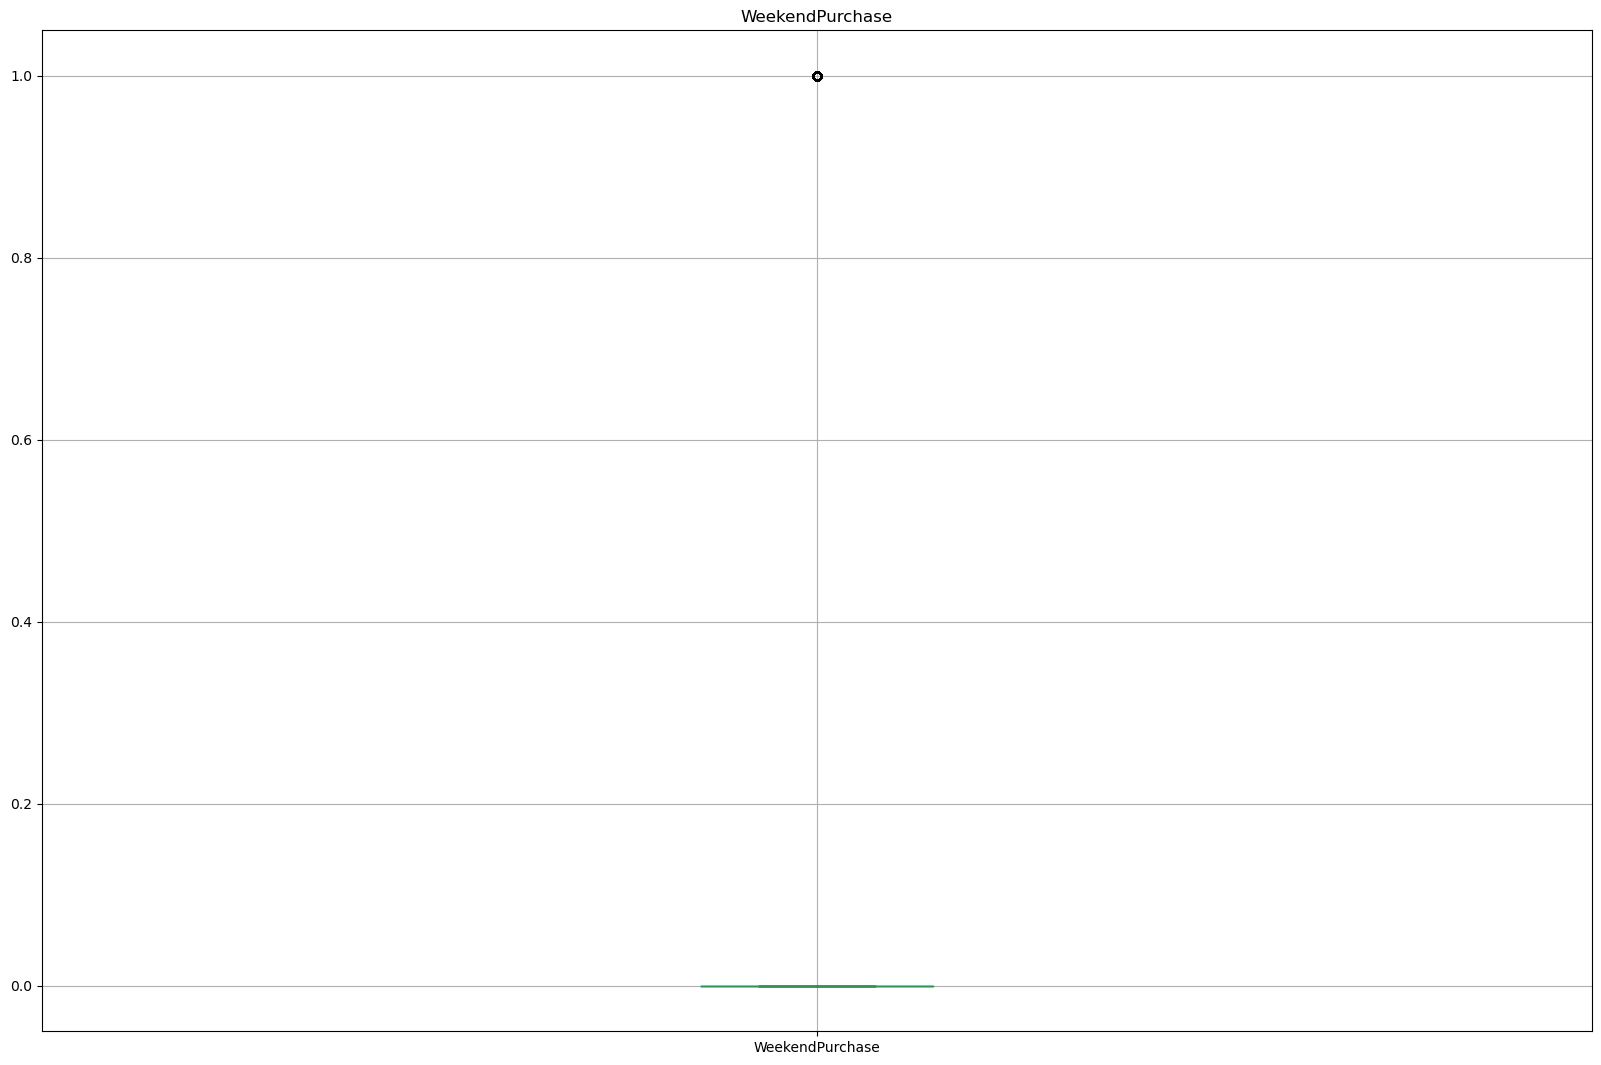

In [17]:
# # ----------BOX PLot of all numerical columns-------    
for col in data.select_dtypes(include=['float64']):
    plt.figure()
    data.boxplot([col])
    plt.title(col)
    
    


## **Data Preprocessing**

In [18]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numeric_features = numerical_columns_selector(data)
categorical_features = categorical_columns_selector(data)

In [19]:
numeric_features

['HomePage',
 'HomePage_Duration',
 'LandingPage',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Page Values',
 'SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type of Traffic',
 'WeekendPurchase']

In [20]:
categorical_features

['Month_SeasonalPurchase',
 'CustomerType',
 'Gender',
 'Cookies Setting',
 'Education',
 'Marital Status']

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB,ComplementNB
from sklearn.neural_network import MLPClassifier

numeric_transfomer = Pipeline([('si', SimpleImputer(missing_values=np.nan, strategy='median')), ('ss', StandardScaler())])
categorical_transformer = Pipeline([('si', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), ('oe' ,OneHotEncoder())])
p = ColumnTransformer(transformers=[('num', numeric_transfomer, numeric_features), 
                                ('cat', categorical_transformer, categorical_features)])

In [22]:
from sklearn import set_config
set_config(display='diagram')
Final = Pipeline([('ct', p)])
Final

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['HomePage',
                                                   'HomePage_Duration',
                                                   'LandingPage',
                                                   'LandingPage_Duration',
                                                   'ProductDescriptionPage',
                                                   'ProductDescriptionPage_Duration',
                                                   'GoogleMetric:Bounce Rates',
                                                   'GoogleMetric:Page Values',
                                                   'SeasonalPurchase', 'OS',
                                                   'SearchEngine', 'Zone',
                                                   'Type of Traffic',
                                                   'WeekendPurchase']),
                                                 ('cat',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe',
                                                                   OneHotEncoder())]),
                                                  ['Month_SeasonalPurchase',
                                                   'CustomerType', 'Gender',
                                                   'Cookies Setting',
                                                   'Education',
                                                   'Marital Status'])]))])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size=0.80)
X_train = p.fit_transform(X_train)
X_test = p.transform(X_test)

In [24]:
X_train.shape

(11784, 40)

In [25]:
X_test.shape

(2947, 40)

## **Feature selection**

#### **1. Filter Based Methods**

### **VarianceThreshold**

In [26]:
# from sklearn.feature_selection import VarianceThreshold
# vt = VarianceThreshold(threshold=0.01)
# X_train = vt.fit_transform(X_train)
# X_test = vt.transform(X_test)

In [27]:
# X_train.shape,X_test.shape

### **SelectKBest**

In [28]:
# from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect, mutual_info_classif
# skb = SelectKBest(mutual_info_classif,k=10)
# X_train = skb.fit_transform(X_train, y_train)
# X_test = skb.transform(X_test)

### **SelectPercentile**

In [29]:
# sp = SelectPercentile(mutual_info_classif, percentile=10)
# X_train = sp.fit_transform(X_train, y_train)
# X_test = sp.transform(X_test)

### **GenericUnivariateSelect**

In [30]:
# gus = GenericUnivariateSelect(mutual_info_classif, mode='k_best', param=4)
# X_train = gus.fit_transform(X_train, y_train)
# X_test = gus.transform(X_test)

#### **2. Wrapper-based selection methods**

### **RFE**

In [31]:
# from sklearn.feature_selection import RFE

# estimator = LogisticRegression()
# selector = RFE(estimator, n_features_to_select=7, step=1)
# selector = selector.fit(X_train, y_train)
# X_train = selector.transform(X_train)
# X_test = selector.transform(X_test)

### **SelectFromModel**

In [32]:
# from sklearn.feature_selection import SelectFromModel

# estimator = LogisticRegression()
# estimator.fit(X_train, y_train)

# model = SelectFromModel(estimator, max_features=3, prefit=True)
# X_train = model.transform(X_train)
# X_test = model.transform(X_test)

### **SequentialFeatureSelector**

In [33]:
# from sklearn.feature_selection import SequentialFeatureSelector

# estimator = LogisticRegression()

# sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
# X_train = sfs.fit_transform(X_train, y_train)
# X_test = sfs.transform(X_test)

## **Dimensionality reduction (PCA)**

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X_train)


PCA(n_components=7)

In [35]:
pca.explained_variance_

array([3.15691897, 1.40857384, 1.20843138, 1.0684152 , 1.00179111,
       0.99023909, 0.96013222])

In [36]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## **BaseLine Model**

In [37]:
from sklearn.dummy import DummyClassifier
models = {
    "BaseLine" : DummyClassifier(strategy="most_frequent")
}

# -- Train the Model -- #
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # -- Predict from Model -- #
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)
    
    
    # -- Training set Performance-- #
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    
    # -- Test set Performance -- #
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
                                             
                                             
    print(list(models.keys())[i])  
    
    print("Model Performance on Training Set")
    print('Accuracy : {:.5f}'.format(model_train_accuracy))
    print('F1 Score : {:.5f}'.format(model_train_f1))
    print('Precision : {:.5f}'.format(model_train_precision))
    print('Recall : {:.5f}'.format(model_train_recall))
    print('Roc Auc Score : {:.5f}'.format(model_train_roc_auc_score))
    
    print("---------------------------------")
    
    print("Model Performance on Test Set")
    print('Accuracy : {:.5f}'.format(model_test_accuracy))
    print('F1 Score : {:.5f}'.format(model_test_f1))
    print('Precision : {:.5f}'.format(model_test_precision))
    print('Recall : {:.5f}'.format(model_test_recall))
    print('Roc Auc Score : {:.5f}'.format(model_test_roc_auc_score))
#     disp = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
#     disp.plot()
    plt.show()
    
    print('='*40)
    print('\n')

BaseLine
Model Performance on Training Set
Accuracy : 0.61414
F1 Score : 0.00000
Precision : 0.00000
Recall : 0.00000
Roc Auc Score : 0.50000
---------------------------------
Model Performance on Test Set
Accuracy : 0.62029
F1 Score : 0.00000
Precision : 0.00000
Recall : 0.00000
Roc Auc Score : 0.50000




/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Data Modelling**

In [38]:

models = {
    "Logistic Regression" : LogisticRegression(max_iter=700),
    "Decision Tree" : DecisionTreeClassifier()
}

# -- Train the Model -- #
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # -- Predict from Model -- #
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)
    
    
    # -- Training set Performance-- #
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    
    # -- Test set Performance -- #
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
                                             
                                             
    print(list(models.keys())[i])  
    
    print("Model Performance on Training Set")
    print('Accuracy : {:.5f}'.format(model_train_accuracy))
    print('F1 Score : {:.5f}'.format(model_train_f1))
    print('Precision : {:.5f}'.format(model_train_precision))
    print('Recall : {:.5f}'.format(model_train_recall))
    print('Roc Auc Score : {:.5f}'.format(model_train_roc_auc_score))
    
    print("---------------------------------")
    
    print("Model Performance on Test Set")
    print('Accuracy : {:.5f}'.format(model_test_accuracy))
    print('F1 Score : {:.5f}'.format(model_test_f1))
    print('Precision : {:.5f}'.format(model_test_precision))
    print('Recall : {:.5f}'.format(model_test_recall))
    print('Roc Auc Score : {:.5f}'.format(model_test_roc_auc_score))
#     disp = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
#     disp.plot()
    plt.show()
    
    print('='*40)
    print('\n')

Logistic Regression
Model Performance on Training Set
Accuracy : 0.64571
F1 Score : 0.24270
Precision : 0.69255
Recall : 0.14713
Roc Auc Score : 0.55305
---------------------------------
Model Performance on Test Set
Accuracy : 0.64880
F1 Score : 0.22819
Precision : 0.68919
Recall : 0.13673
Roc Auc Score : 0.54949


Decision Tree
Model Performance on Training Set
Accuracy : 0.83724
F1 Score : 0.73574
Precision : 0.98488
Recall : 0.58720
Roc Auc Score : 0.79077
---------------------------------
Model Performance on Test Set
Accuracy : 0.49067
F1 Score : 0.27732
Precision : 0.30063
Recall : 0.25737
Roc Auc Score : 0.44543




In [39]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## **Hyperparameter Tuning**

In [40]:
dt_params = {
    "max_depth" : [15, 20, 100, 200],
    "criterion" : ["gini", "entropy", "log_loss"],
    "min_impurity_decrease" : [0.1, 0.01, 0.001, 0.0001]
}
lr_params = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-2,2,5),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': np.linspace(400,700,3)
}
crossValidation_model = [
    ("DT", DecisionTreeClassifier(), dt_params),
    ("LR", LogisticRegression(), lr_params)
]

In [41]:
# model_param = {}
# for name, model, params in crossValidation_model:
#     random = RandomizedSearchCV(estimator = model, param_distributions= params, n_iter=100, cv=3, verbose=2, n_jobs=1)
#     random.fit(X_train, y_train)
#     model_param[name] = random.best_params_
    
    
# for model_name in model_param:
#     print(f'---------Best param for {model_name} ------------- ')
#     print(model_param[model_name])

In [42]:
# model_param

In [43]:
models = {
    "Logistic Regression" : LogisticRegression(max_iter=400,solver='lbfgs', penalty='l2', C=1.0),
    "Decision Tree" : DecisionTreeClassifier(min_impurity_decrease=0.001, max_depth=15, criterion='gini')
}

# -- Train the Model -- #
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # -- Predict from Model -- #
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)
    
    
    # -- Training set Performance-- #
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    
    # -- Test set Performance -- #
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
                                             
                                             
    print(list(models.keys())[i])  
    
    print("Model Performance on Training Set")
    print('Accuracy : {:.5f}'.format(model_train_accuracy))
    print('F1 Score : {:.5f}'.format(model_train_f1))
    print('Precision : {:.5f}'.format(model_train_precision))
    print('Recall : {:.5f}'.format(model_train_recall))
    print('Roc Auc Score : {:.5f}'.format(model_train_roc_auc_score))
    
    print("---------------------------------")
    
    print("Model Performance on Test Set")
    print('Accuracy : {:.5f}'.format(model_test_accuracy))
    print('F1 Score : {:.5f}'.format(model_test_f1))
    print('Precision : {:.5f}'.format(model_test_precision))
    print('Recall : {:.5f}'.format(model_test_recall))
    print('Roc Auc Score : {:.5f}'.format(model_test_roc_auc_score))
    
    print('='*40)
    print('\n')

Logistic Regression
Model Performance on Training Set
Accuracy : 0.64571
F1 Score : 0.24270
Precision : 0.69255
Recall : 0.14713
Roc Auc Score : 0.55305
---------------------------------
Model Performance on Test Set
Accuracy : 0.64880
F1 Score : 0.22819
Precision : 0.68919
Recall : 0.13673
Roc Auc Score : 0.54949


Decision Tree
Model Performance on Training Set
Accuracy : 0.64655
F1 Score : 0.20863
Precision : 0.76676
Recall : 0.12074
Roc Auc Score : 0.54883
---------------------------------
Model Performance on Test Set
Accuracy : 0.64778
F1 Score : 0.19410
Precision : 0.73964
Recall : 0.11171
Roc Auc Score : 0.54382




## **KNN & SVM**

In [44]:
models = {
    "KNN" : KNeighborsClassifier(),
#     "SVC" : SVC()
}

# -- Train the Model -- #
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # -- Predict from Model -- #
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)
    
    
    # -- Training set Performance-- #
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    
    # -- Test set Performance -- #
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
                                             
                                             
    print(list(models.keys())[i])  
    
    print("Model Performance on Training Set")
    print('Accuracy : {:.5f}'.format(model_train_accuracy))
    print('F1 Score : {:.5f}'.format(model_train_f1))
    print('Precision : {:.5f}'.format(model_train_precision))
    print('Recall : {:.5f}'.format(model_train_recall))
    print('Roc Auc Score : {:.5f}'.format(model_train_roc_auc_score))
    
    print("---------------------------------")
    
    print("Model Performance on Test Set")
    print('Accuracy : {:.5f}'.format(model_test_accuracy))
    print('F1 Score : {:.5f}'.format(model_test_f1))
    print('Precision : {:.5f}'.format(model_test_precision))
    print('Recall : {:.5f}'.format(model_test_recall))
    print('Roc Auc Score : {:.5f}'.format(model_test_roc_auc_score))
    
    print('='*40)
    print('\n')

KNN
Model Performance on Training Set
Accuracy : 0.70511
F1 Score : 0.53673
Precision : 0.68145
Recall : 0.44271
Roc Auc Score : 0.65634
---------------------------------
Model Performance on Test Set
Accuracy : 0.55921
F1 Score : 0.31088
Precision : 0.38251
Recall : 0.26184
Roc Auc Score : 0.50154




In [45]:
knn_params = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}
svc_params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf','linear']
}
crossValidation_model = [("KNN", KNeighborsClassifier(), knn_params),("SVC", SVC(), svc_params)]

In [46]:
# model_param = {}
# for name, model, params in crossValidation_model:
#     random = GridSearchCV(estimator = model, param_grid= params, cv=3, verbose=2, n_jobs=1)
#     random.fit(X_train, y_train)
#     model_param[name] = random.best_params_
    
    
# for model_name in model_param:
#     print(f'---------Best param for {model_name} ------------- ')
#     print(model_param[model_name])

In [47]:
# model_param

In [48]:
models = {
    "KNN" : KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='uniform'),
#     "SVC" : SVC(C=60,gamma=0.01, kernel='rbf')
}

# -- Train the Model -- #
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # -- Predict from Model -- #
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)
    
    
    # -- Training set Performance-- #
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    
    # -- Test set Performance -- #
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
                                             
                                             
    print(list(models.keys())[i])  
    
    print("Model Performance on Training Set")
    print('Accuracy : {:.5f}'.format(model_train_accuracy))
    print('F1 Score : {:.5f}'.format(model_train_f1))
    print('Precision : {:.5f}'.format(model_train_precision))
    print('Recall : {:.5f}'.format(model_train_recall))
    print('Roc Auc Score : {:.5f}'.format(model_train_roc_auc_score))
    
    print("---------------------------------")
    
    print("Model Performance on Test Set")
    print('Accuracy : {:.5f}'.format(model_test_accuracy))
    print('F1 Score : {:.5f}'.format(model_test_f1))
    print('Precision : {:.5f}'.format(model_test_precision))
    print('Recall : {:.5f}'.format(model_test_recall))
    print('Roc Auc Score : {:.5f}'.format(model_test_roc_auc_score))
    
    print('='*40)
    print('\n')

KNN
Model Performance on Training Set
Accuracy : 0.66879
F1 Score : 0.38738
Precision : 0.67654
Recall : 0.27139
Roc Auc Score : 0.59493
---------------------------------
Model Performance on Test Set
Accuracy : 0.62640
F1 Score : 0.29649
Precision : 0.52018
Recall : 0.20733
Roc Auc Score : 0.54513




## **CART, Bagging, Boosting & MLP**

In [49]:
models = {
    "BAGGING" : BaggingClassifier(),
    "BOOSTING" : GradientBoostingClassifier(),
    "MLP" : MLPClassifier(),
    "XGB": XGBClassifier()
}

# -- Train the Model -- #
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # -- Predict from Model -- #
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)
    
    
    # -- Training set Performance-- #
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    
    # -- Test set Performance -- #
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
                                             
                                             
    print(list(models.keys())[i])  
    
    print("Model Performance on Training Set")
    print('Accuracy : {:.5f}'.format(model_train_accuracy))
    print('F1 Score : {:.5f}'.format(model_train_f1))
    print('Precision : {:.5f}'.format(model_train_precision))
    print('Recall : {:.5f}'.format(model_train_recall))
    print('Roc Auc Score : {:.5f}'.format(model_train_roc_auc_score))
    
    print("---------------------------------")
    
    print("Model Performance on Test Set")
    print('Accuracy : {:.5f}'.format(model_test_accuracy))
    print('F1 Score : {:.5f}'.format(model_test_f1))
    print('Precision : {:.5f}'.format(model_test_precision))
    print('Recall : {:.5f}'.format(model_test_recall))
    print('Roc Auc Score : {:.5f}'.format(model_test_roc_auc_score))
    
    print('='*40)
    print('\n')

BAGGING
Model Performance on Training Set
Accuracy : 0.82705
F1 Score : 0.76521
Precision : 0.80353
Recall : 0.73037
Roc Auc Score : 0.80909
---------------------------------
Model Performance on Test Set
Accuracy : 0.50221
F1 Score : 0.28264
Precision : 0.31210
Recall : 0.25827
Roc Auc Score : 0.45490


BOOSTING
Model Performance on Training Set
Accuracy : 0.66760
F1 Score : 0.32337
Precision : 0.75362
Recall : 0.20585
Roc Auc Score : 0.58178
---------------------------------
Model Performance on Test Set
Accuracy : 0.64574
F1 Score : 0.25215
Precision : 0.63538
Recall : 0.15728
Roc Auc Score : 0.55102


MLP
Model Performance on Training Set
Accuracy : 0.66590
F1 Score : 0.34742
Precision : 0.70525
Recall : 0.23048
Roc Auc Score : 0.58498
---------------------------------
Model Performance on Test Set
Accuracy : 0.64913
F1 Score : 0.30135
Precision : 0.61773
Recall : 0.19929
Roc Auc Score : 0.56190


XGB
Model Performance on Training Set
Accuracy : 0.75679
F1 Score : 0.58355
Precision

In [50]:
bag_params = {
    'n_estimators': [100, 150,200 ,250 ],
    'max_samples': [0.01, 0.03, 0.05, 0.09],
    'bootstrap': [True, False],
}
bos_params = {
    "n_estimators": [20, 25, 30, 50],
    "max_depth": [2, 5, 10, 20],
    "learning_rate": [0.01,0.1],
}
mlp_params = {
    'hidden_layer_sizes': [(6,8,4,5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}
xgb_params = {
    'max_depth': [100, 150, 200, 250, 300],
    'n_estimators': [100, 150, 200 ],
    'min_child_weight': [10, 25, 40],
    'reg_alpha': [0.01, 0.05],
    'learning_rate': [0.2, 0.1, 0.01, 0.001],
}


crossValidation_model = [("BAG", BaggingClassifier(), bag_params),
                         ("BOS", GradientBoostingClassifier(), bos_params),
                        ("MLP", MLPClassifier(), mlp_params),
                        ("XGB", XGBClassifier(), xgb_params)]

In [51]:
# model_param = {}
# for name, model, params in crossValidation_model:
#     random = GridSearchCV(estimator = model, param_grid= params, cv=3, verbose=2, n_jobs=1)
#     random.fit(X_train, y_train)
#     model_param[name] = random.best_params_
    
    
# for model_name in model_param:
#     print(f'---------Best param for {model_name} ------------- ')
#     print(model_param[model_name])

In [52]:
# model_param

In [53]:
models = {
    "BAGGING" : BaggingClassifier(n_estimators=250, max_samples=0.03, bootstrap=True,),
    "BOOSTING" : GradientBoostingClassifier(n_estimators=30,learning_rate=0.1,max_features='auto',max_depth=2),
    "MLP" : MLPClassifier(activation='tanh',alpha=0.01,hidden_layer_sizes=(6,8,4,5),learning_rate='constant',solver='sgd'),
    "XGB" : XGBClassifier(max_depth=250, learning_rate=0.01, n_estimators=150,min_child_weight=24, reg_alpha=0.05)
}

# -- Train the Model -- #
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # -- Predict from Model -- #
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)
    
    
    # -- Training set Performance-- #
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall =recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    
    # -- Test set Performance -- #
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall =recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
                                             
                                             
    print(list(models.keys())[i])  
    
    print("Model Performance on Training Set")
    print('Accuracy : {:.5f}'.format(model_train_accuracy))
    print('F1 Score : {:.5f}'.format(model_train_f1))
    print('Precision : {:.5f}'.format(model_train_precision))
    print('Recall : {:.5f}'.format(model_train_recall))
    print('Roc Auc Score : {:.5f}'.format(model_train_roc_auc_score))
    
    print("---------------------------------")
    
    print("Model Performance on Test Set")
    print('Accuracy : {:.5f}'.format(model_test_accuracy))
    print('F1 Score : {:.5f}'.format(model_test_f1))
    print('Precision : {:.5f}'.format(model_test_precision))
    print('Recall : {:.5f}'.format(model_test_recall))
    print('Roc Auc Score : {:.5f}'.format(model_test_roc_auc_score))
    
    print('='*40)
    print('\n')

BAGGING
Model Performance on Training Set
Accuracy : 0.66675
F1 Score : 0.33632
Precision : 0.72628
Recall : 0.21883
Roc Auc Score : 0.58350
---------------------------------
Model Performance on Test Set
Accuracy : 0.64710
F1 Score : 0.28077
Precision : 0.62080
Recall : 0.18141
Roc Auc Score : 0.55679


BOOSTING
Model Performance on Training Set
Accuracy : 0.65139
F1 Score : 0.24485
Precision : 0.74580
Recall : 0.14647
Roc Auc Score : 0.55755
---------------------------------
Model Performance on Test Set
Accuracy : 0.65219
F1 Score : 0.22407
Precision : 0.73267
Recall : 0.13226
Roc Auc Score : 0.55136


MLP
Model Performance on Training Set
Accuracy : 0.65148
F1 Score : 0.31811
Precision : 0.64905
Recall : 0.21069
Roc Auc Score : 0.56956
---------------------------------
Model Performance on Test Set
Accuracy : 0.65117
F1 Score : 0.29685
Precision : 0.63265
Recall : 0.19392
Roc Auc Score : 0.56250


XGB
Model Performance on Training Set
Accuracy : 0.67193
F1 Score : 0.36205
Precision

## **Submit The Predication**

In [54]:
numeric_transfomer = Pipeline([('si', SimpleImputer(missing_values=np.nan, strategy='median')), ('ss', StandardScaler())])
categorical_transformer = Pipeline([('si', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), ('oe' ,OneHotEncoder())])
p = ColumnTransformer(transformers=[('num', numeric_transfomer, numeric_features), 
                                ('cat', categorical_transformer, categorical_features)])

In [55]:
X_train = p.fit_transform(data)
model = LogisticRegression(max_iter=400,solver='liblinear', penalty='l1', C=1)
# model = MLPClassifier(hidden_layer_sizes=(6,4,3,5), solver='adam',activation='tanh', alpha=0.05, max_iter=70,
#                       learning_rate='adaptive',)
# model = XGBClassifier(max_depth=250, learning_rate=0.01, n_estimators=150,min_child_weight=24, reg_alpha=0.05)
X_train = pca.transform(X_train)
model.fit(X_train,y)
X_test = p.transform(test_df)
X_test = pca.transform(X_test)
ypred = model.predict(X_test)
ypred = ypred.astype(bool)

In [56]:
# pd.Series(ypred).value_counts(normalize=True)

In [57]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(ypred))]
submission["Made_Purchase"]=[i for i in ypred]
submission.to_csv('submission.csv',index=False)

In [58]:
# y_train.value_counts(normalize=True)